<hr style="border: none; height: 30px; background: linear-gradient(to right, black, red,white);">

<h1 style="text-align: center; font-weight: bold; font-size: 48px; background: linear-gradient(to right, Red, red,Orange,white); -webkit-background-clip: text; color: transparent;">Vehicle Sales Analysis</h1>


<hr style="border: none; height: 30px; background: linear-gradient(to right, white, red,black);">

<h1 style="text-align: left; color: yellow; font-weight: bold;font-size: 36;"> Introduction</h1>

 

When considering the purchase of a vehicle, one of the key questions that often arises is its potential resale value. Many buyers wonder about the factors that can influence the selling price later on. Understanding these factors is crucial for making informed decisions and maximizing the value of your investment.

In this exploration of the Vehicle Sales dataset, we aim to identify the best brand-new or used cars to buy, which can be sold to dealerships or directly to buyers for a good price while minimizing depreciation. Factors such as brand reputation, model popularity, mileage and age of the vehicle will be analyzed to pinpoint cars that hold their value well over time, making them potentially lucrative investments.

<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">


<h1 style="text-align: left; color: yellow; font-weight: bold;font-size: 36;"> Data Collection</h1>

In [1290]:
# Import essential packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob
from datetime import datetime
from sklearn.datasets import make_blobs, make_classification
import pytz
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [1291]:
# Import data from Github
url = 'https://raw.githubusercontent.com/Kittisak-M/vehicle_sales/main/Vehicale_car_sales.csv'

car_sales = pd.read_csv(url)

C:\Users\Kmaun\AppData\Local\Temp\ipykernel_4016\3986174596.py:4: DtypeWarning:

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.



<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">

<h1 style="text-align: left; color: yellow; font-weight: bold;font-size: 36;"> Glance the Dataset</h1>

In [1292]:
# See top 5 rows
car_sales.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Column1
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),#NAME?
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),NaN


In [1293]:
# And 5 bottom rows
car_sales.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Column1
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),NaN
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),NaN
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),NaN
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),NaN
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,34.0,15008.0,gray,gray,ford motor credit company llc pd,29600.0,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT),NaN


In [1294]:
car_sales.shape

(558837, 17)

In [1295]:
car_sales.describe

<bound method NDFrame.describe of         year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558832  2015     Kia                 K900       Luxury      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   16

In [1296]:
# See data structure
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
 16  Column1       1 non-null       object 
dtypes: float64(4), int64(1), object(12)
memory usage

There are missing values in the dataframe, we need to cleanse it.

In [1297]:
# Count null value in each columns
car_sales.isnull().sum()

year                 0
make             10301
model            10399
trim             10651
body             13195
transmission     65352
vin                  4
state                0
condition        11820
odometer            94
color              749
interior           749
seller               0
mmr                 38
sellingprice        12
saledate            12
Column1         558836
dtype: int64

<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">

<h1 style="text-align: left; color: yellow; font-weight: bold;font-size: 36;"> Data Cleansing</h1>

In [1298]:
car_sales.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
Column1          object
dtype: object

In [1299]:
# Check how much percent missing value from the dataset

car_sales.isnull().mean().round(2) * 100

year              0.0
make              2.0
model             2.0
trim              2.0
body              2.0
transmission     12.0
vin               0.0
state             0.0
condition         2.0
odometer          0.0
color             0.0
interior          0.0
seller            0.0
mmr               0.0
sellingprice      0.0
saledate          0.0
Column1         100.0
dtype: float64

As you can see, there is a 12% missing value in the 'transmission' column, which exceeds the 10% threshold. Cleasing or transformation is necessary

In [1300]:
# Remove unncessary column
cleaned_cs = car_sales.drop(['vin','mmr'], axis=1)

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Transmission column

In [1301]:
# Count unique value in the transmission column
car_sales['transmission'].value_counts(dropna=False)

transmission
automatic    475915
NaN           65352
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

Calculate ratio between 'manual' and 'automatic in the transmission column

In [1302]:
# Convert all values in 'transmission' column to lowercase
cleaned_cs['transmission'] = cleaned_cs['transmission'].str.lower()

# Replace 'sedan' with np.nan (actual NaN value)
cleaned_cs['transmission'] = cleaned_cs['transmission'].replace('sedan', np.nan)

# Count the occurrences of each value in the 'transmission' column
transmission_counts = cleaned_cs['transmission'].value_counts(dropna=False)

print(transmission_counts)


transmission
automatic    475915
NaN           65378
manual        17544
Name: count, dtype: int64


Calculate percentage between 'manual' and 'automatic' in the transmission column in order to replace with 'NaN' with the same percentage(uncleaned version)

In [1303]:
# Find ratio transmission and automatic
manual =  cleaned_cs['transmission'].value_counts().get('manual', 0)

auto = cleaned_cs['transmission'].value_counts().get('automatic', 0)

total_m_and_a = cleaned_cs['transmission'].value_counts().get('manual', 0) + cleaned_cs['transmission'].value_counts().get('automatic', 0)

total_ms = cleaned_cs['transmission'].isna().sum()

# Calculate percentage between automatic and manual then round up
m2allms_percent = manual / total_m_and_a * 100

a2allms_percent  = auto / total_m_and_a * 100

# Calculate how many rows it have to be replaced with 'NaN' in the column
m2allms = m2allms_percent * total_ms / 100

a2allms  =  a2allms_percent * total_ms / 100

print('total missing value: ', total_ms, 'rows')
print('manual to all_ms percentage: ',m2allms_percent, '%')
print('auto to all_ms percentage: ',a2allms_percent, '%')
print('count rows to fill missing value with manual: ',m2allms.round())
print('count rows to fill missing value with auto: ',a2allms.round())

total missing value:  65378 rows
manual to all_ms percentage:  3.5553105729148724 %
auto to all_ms percentage:  96.44468942708512 %
count rows to fill missing value with manual:  2324.0
count rows to fill missing value with auto:  63054.0


In [1304]:
cleaned_cs['transmission'].value_counts(dropna=False)

transmission
automatic    475915
NaN           65378
manual        17544
Name: count, dtype: int64

In [1305]:
# Replace NaN with 'automatic' for 63054 rows
auto_indices = cleaned_cs[cleaned_cs['transmission'].isnull()].sample(n=63054).index
cleaned_cs.loc[auto_indices, 'transmission'] = 'automatic'

# Replace NaN with 'manual' for 2412 rows
manual_indices = cleaned_cs[cleaned_cs['transmission'].isnull()].sample(n=2324).index
cleaned_cs.loc[manual_indices, 'transmission'] = 'manual'

In [1306]:
# Check value count percentage After cleansing (it needs to be the same befor cleansing)
value_counts = cleaned_cs['transmission'].value_counts(dropna=False)

# Calculate the total count
total_count = value_counts.sum()

# Calculate the percentage of each value
value_counts_percentage = (value_counts / total_count * 100).round(2)
print('percentage: ', value_counts_percentage)


percentage:  transmission
automatic    96.44
manual        3.56
Name: count, dtype: float64


In [1307]:
# Verify the column is clear
cleaned_cs['transmission'].value_counts(dropna= False)

transmission
automatic    538969
manual        19868
Name: count, dtype: int64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Year column

In [1308]:
# Cout value in the 'Year' column and see if there is 'NaN' 
cleaned_cs['year'].value_counts(dropna=False).sort_index()

year
1982         2
1983         1
1984         5
1985        10
1986        11
1987         8
1988        11
1989        20
1990        49
1991        67
1992       132
1993       205
1994       392
1995       711
1996       851
1997      1546
1998      2149
1999      3363
2000      5227
2001      6468
2002      9715
2003     13281
2004     17342
2005     21394
2006     26913
2007     30845
2008     31502
2009     20594
2010     26485
2011     48548
2012    102315
2013     98168
2014     81070
2015      9437
Name: count, dtype: int64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Make Column

In [1309]:
# Cout value in the 'make' column and see if there is 'NaN' or incorrect name
cleaned_cs['make'].value_counts(dropna=False).sort_index(ascending=False)

make
vw                 24
volkswagen         24
toyota             95
suzuki              5
subaru             60
                ...  
BMW             20719
Audi             5869
Aston Martin       25
Acura            5901
NaN             10301
Name: count, Length: 97, dtype: int64

In [1310]:
# The missing value do not reach 5 percent of all rows, so droping null value is needed
percent = cleaned_cs['make'].isnull().sum() / cleaned_cs.shape[0] * 100

round_percent = percent.round(2)

print("Missing value percentage in the 'make'column: ",round_percent, "%")

Missing value percentage in the 'make'column:  1.84 %


In [1311]:
# Drop null valve in the column
cleaned_cs = cleaned_cs.dropna(subset=['make'])

In [1312]:
# Recheck null value is already removed
cleaned_cs['make'].value_counts(dropna=False).sort_index(ascending=False)

make
vw                 24
volkswagen         24
toyota             95
suzuki              5
subaru             60
                ...  
Bentley           116
BMW             20719
Audi             5869
Aston Martin       25
Acura            5901
Name: count, Length: 96, dtype: int64

Chatgpt is needed to get answer which one is not a car brand name.

This is my personal helper's answer: The item 'dot' is not a car brand name. It might refer to the Department of Transportation (DOT) or another entity, as it is not a commonly known car brand.

In [1313]:
# It is needed to rearrange the unique value in the column in order to easily transform the data
un_value_make = cleaned_cs['make'].unique()

un_valve_make_sort = sorted(un_value_make)

print(un_valve_make_sort)

['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'acura', 'airstream', 'audi', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet', 'chrysler', 'dodge', 'dodge tk', 'dot', 'ford', 'ford tk', 'ford truck', 'gmc', 'gmc truck', 'honda', 'hyundai', 'hyundai tk', 'jeep', 'kia', 'land rover', 'landrover', 'lexus', 'lincoln', 'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b', 'mercury', 'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'smart', 'subaru', 'suzuki', 'toyota', 'vo

In [1314]:
# Remove 'dot' in the column
cleaned_cs = cleaned_cs[cleaned_cs['make'] != 'dot'].copy()

# List car brand name to be replaced
name_replace_list = {'dodge tk':'dodge','ford tk':'ford','ford truck':'ford','gmc truck':'gmc','hyundai tk': 'hyundai','mazda tk':'mazda', 'mercedes-b':'mercedes-benz', 'mercedes':'mercedes-benz','vw':'volkswagen','chev truck':'chevrolet'}

# Replace the value
cleaned_cs.loc[:, 'make'] = cleaned_cs['make'].replace(name_replace_list)


In [1315]:
# Lower the case
cleaned_cs.loc[:, 'make'] = cleaned_cs['make'].str.lower()
cleaned_cs['make'].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'saab',
       'suzuki', 'oldsmobile', 'isuzu', 'geo', 'rolls-royce', 'daewoo',
       'plymouth', 'tesla', 'airstream', 'aston martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [1316]:
# Make sure the data is already cleansed
done = cleaned_cs['make'].sort_values().unique()

done

array(['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw',
       'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge',
       'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda',
       'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia',
       'lamborghini', 'land rover', 'landrover', 'lexus', 'lincoln',
       'lotus', 'maserati', 'mazda', 'mercedes-benz', 'mercury', 'mini',
       'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac',
       'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion',
       'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen',
       'volvo'], dtype=object)

In [1317]:
# Count null value in the 'model' column
cleaned_cs['model'].isnull().sum()

98

In [1318]:
# Remove null value
cleaned_cs = cleaned_cs.dropna(subset=['model'])

# Lower character
cleaned_cs['model'] = cleaned_cs['model'].str.lower()

In [1319]:
# See unique value in the 'model' column
cleaned_cs['model'].value_counts().sort_values()

model
458 italia        1
swift             1
323i              1
cabriolet         1
b-series          1
              ...  
escape        11893
camry         12549
fusion        12946
f-150         14479
altima        19349
Name: count, Length: 851, dtype: int64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Trim column

In [1320]:
# Count unique value in the 'model' column
cleaned_cs['trim'].nunique()

1962

In [1321]:
# Count missing value in the 'model' column
cleaned_cs['trim'].isnull().sum()

349

In [1322]:
# Remove null value 
cleaned_cs = cleaned_cs.dropna(subset=['trim'])

In [1323]:
# Count null value after removing
cleaned_cs['trim'].isnull().sum()

0

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Body column

In [1324]:
cleaned_cs['body'].value_counts()

body
Sedan          199364
SUV            119292
sedan           41881
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64

In [1325]:
cleaned_cs['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

In [1326]:
# Count null value in the 'model' column
cleaned_cs['body'].isnull().sum()

2544

In [1327]:
# Remove null value
cleaned_cs = cleaned_cs.dropna(subset=['body'])

# Lower character
cleaned_cs.loc[:, 'body'] = cleaned_cs['body'].str.lower()


In [1328]:
cleaned_cs['body'].unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'cab plus', 'beetle convertible',
       'tsx sport wagon', 'promaster cargo van',
       'granturismo convertible', 'cts-v wagon', 'ram van', 'transit van',
       'navitgation', 'regular-cab'], dtype=object)

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

State Column

In [1329]:
cleaned_cs['state'].value_counts()

state
fl                   81150
ca                   71131
pa                   53054
tx                   44955
ga                   33885
                     ...  
3vwd17aj2fm285365        1
3vwd17aj3fm276741        1
3vwd17aj2fm258506        1
3vwd17aj4fm201708        1
3vwd17aj2fm261566        1
Name: count, Length: 64, dtype: int64

In [1330]:
cleaned_cs['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nv',
       'oh', 'mi', 'nj', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

In [1331]:
state_remove_list = ['3vwd17aj4fm201708','3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
                       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
        '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566']

In [1332]:
cleaned_cs = cleaned_cs[~cleaned_cs['state'].isin(state_remove_list)]


In [1333]:
cleaned_cs['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nv',
       'oh', 'mi', 'nj', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Condition column

In [1334]:
cleaned_cs['condition'].unique()

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., nan, 49., 17.,
       19., 29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46.,
       36., 35., 26., 21., 22., 27., 24., 33., 23., 15., 16., 18., 12.,
       14., 11., 13.])

In [1335]:
cleaned_cs['condition'].value_counts(dropna=False)

condition
19.0    40426
35.0    26206
37.0    25507
44.0    25222
43.0    24695
42.0    24066
41.0    22771
36.0    22752
39.0    19665
4.0     19633
2.0     19623
28.0    18648
29.0    18424
38.0    18413
34.0    17022
27.0    15797
49.0    12904
48.0    12570
46.0    12499
45.0    12174
25.0    12146
26.0    11557
47.0    11236
NaN     11200
5.0     11048
3.0     10477
33.0    10372
32.0     9727
24.0     9037
31.0     9016
21.0     8827
23.0     7892
1.0      6911
22.0     5831
18.0      312
17.0      224
16.0      169
15.0      133
14.0      127
12.0       94
11.0       86
13.0       79
Name: count, dtype: int64

In [1336]:
cleaned_cs['condition'].isnull().sum()

11200

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Color column

In [1337]:
cleaned_cs['color'].value_counts()

color
black        108620
white        103615
gray          81515
silver        81466
blue          49768
red           42525
—             24440
gold          10898
green         10796
beige          8904
burgundy       8744
brown          6611
orange         1986
purple         1507
off-white      1415
yellow         1232
charcoal        472
turquoise       224
pink             42
lime             15
Name: count, dtype: int64

In [1338]:
cleaned_cs['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

In [1339]:
cleaned_cs['color'] = cleaned_cs['color'].str.replace('—', '').replace('', np.NaN)

In [1340]:
# fill null value with most frequent value which is 'black'
col_to_impute = cleaned_cs['color']

imputer = SimpleImputer(strategy='most_frequent')

imputed_col = imputer.fit_transform(col_to_impute.values.reshape(-1, 1)).flatten()

cleaned_cs['color'] = imputed_col


In [1341]:
cleaned_cs['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [1342]:
cleaned_cs['color'].isnull().sum()

0

In [1343]:
cleaned_cs['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [1344]:
cleaned_cs['color'].value_counts()

color
black        133783
white        103615
gray          81515
silver        81466
blue          49768
red           42525
gold          10898
green         10796
beige          8904
burgundy       8744
brown          6611
orange         1986
purple         1507
off-white      1415
yellow         1232
charcoal        472
turquoise       224
pink             42
lime             15
Name: count, dtype: int64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Interior column


In [1345]:
cleaned_cs['interior'].isnull().sum()

723

In [1346]:
cleaned_cs['interior'].unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'red', 'yellow', 'blue', 'green',
       'purple', 'orange', 'gold'], dtype=object)

In [1347]:
cleaned_cs['interior'].value_counts()

interior
black        240145
gray         173441
beige         58263
tan           42783
—             16403
brown          8410
red            1312
silver         1065
blue           1040
off-white       480
purple          331
gold            314
white           244
green           225
burgundy        184
orange          135
yellow           20
Name: count, dtype: int64

In [1348]:
cleaned_cs['interior'] = cleaned_cs['interior'].replace('—', np.nan).copy()

In [1349]:
cleaned_cs['interior'].value_counts(dropna=False)

interior
black        240145
gray         173441
beige         58263
tan           42783
NaN           17126
brown          8410
red            1312
silver         1065
blue           1040
off-white       480
purple          331
gold            314
white           244
green           225
burgundy        184
orange          135
yellow           20
Name: count, dtype: int64

In [1350]:
cleaned_cs['interior'] = cleaned_cs['interior'].ffill()

In [1351]:
cleaned_cs['interior'].value_counts(dropna=False)

interior
black        246933
gray         179564
beige         60224
tan           44491
brown          8729
red            1364
blue           1107
silver         1092
off-white       516
purple          346
gold            320
white           250
green           234
burgundy        189
orange          139
yellow           20
Name: count, dtype: int64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Odometer column


In [1352]:
# Assuming 'cleaned_cs' is your DataFrame and 'odometer' is the column with mixed values
non_numeric_count = cleaned_cs['odometer'].apply(lambda x: not str(x).replace('.', '', 1).isdigit()).sum()

print("Number of non-numeric values in 'odometer':", non_numeric_count)


Number of non-numeric values in 'odometer': 85


In [1353]:
# Assuming 'cleaned_cs' is your DataFrame and 'odometer' is the column with mixed values
numeric_count = cleaned_cs['odometer'].apply(lambda x: str(x).replace('.', '', 1).isdigit()).sum()

print("Number of numerical values in 'odometer':", numeric_count)


Number of numerical values in 'odometer': 545433


In [1354]:
cleaned_cs = cleaned_cs.drop('Column1',axis=1)

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Seller column

In [1355]:
cleaned_cs['seller'].isna().sum()

0

In [1356]:
cleaned_cs['seller'].value_counts().sort_index()

seller
1 cochran of monroeville    234
1 for all auto sales          1
101motors                     1
1360250 alberta ltd           1
1360250 alberta ltd.          1
                           ... 
zonemotors.com inc            1
zoom auto                     1
zuma autoboat                 1
zumbrota ford sales llc       1
zygi auto corp                1
Name: count, Length: 14003, dtype: int64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Sellingprice col

In [1357]:
cleaned_cs['sellingprice'].isnull().sum()

12

In [1358]:
cleaned_cs = cleaned_cs.dropna(subset=['sellingprice'])

In [1359]:
# Calculate median
mmr_median = cleaned_cs['sellingprice'].median()

# Calculate mode
mmr_mode = cleaned_cs['sellingprice'].mode()

# Calculate mean
avg = cleaned_cs['sellingprice'].mean()

print("Median:", mmr_median)
print("Mode:", mmr_mode)
print("Mean:", avg)

Median: 12250.0
Mode: 0    11000.0
Name: sellingprice, dtype: float64
Mean: 13724.174150238494


In [1360]:
cleaned_cs['sellingprice']

0         21500.0
1         21500.0
2         30000.0
3         27750.0
4         67000.0
           ...   
558832    33000.0
558833    30800.0
558834    34000.0
558835    11100.0
558836    26700.0
Name: sellingprice, Length: 545506, dtype: float64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Saledate column

In [1361]:
cleaned_cs['saledate'].isnull().sum()

0

In [1362]:
# Mapping of timezone abbreviations to UTC offsets
timezone_offsets = {
    'PST': '-0800',
    'PDT': '-0700',  # Daylight Saving Time
    # Add more timezone abbreviations and offsets as needed
}

date_string = 'Tue Dec 16 2014 12:30:00 PST'

# Extract the timezone abbreviation
timezone_abbr = date_string.split()[-1]

# Replace the timezone abbreviation with the UTC offset
date_string = date_string.replace(timezone_abbr, timezone_offsets.get(timezone_abbr, ''))

# Parse the date string into a datetime object
datetime_obj = datetime.strptime(date_string, '%a %b %d %Y %H:%M:%S %z')

cleaned_cs['saledate']


0         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2         Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3         Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4         Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
                           ...                   
558832    Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835    Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836    Thu May 28 2015 05:30:00 GMT-0700 (PDT)
Name: saledate, Length: 545506, dtype: object

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

We are ready to use the dataset to visualize as cleaned_cs dataframe.

<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">

<h1 style="text-align: left; color: yellow; font-weight: bold;font-size: 36;"> Data Visualization</h1>

In [1363]:
sellingprice_median

12250.0

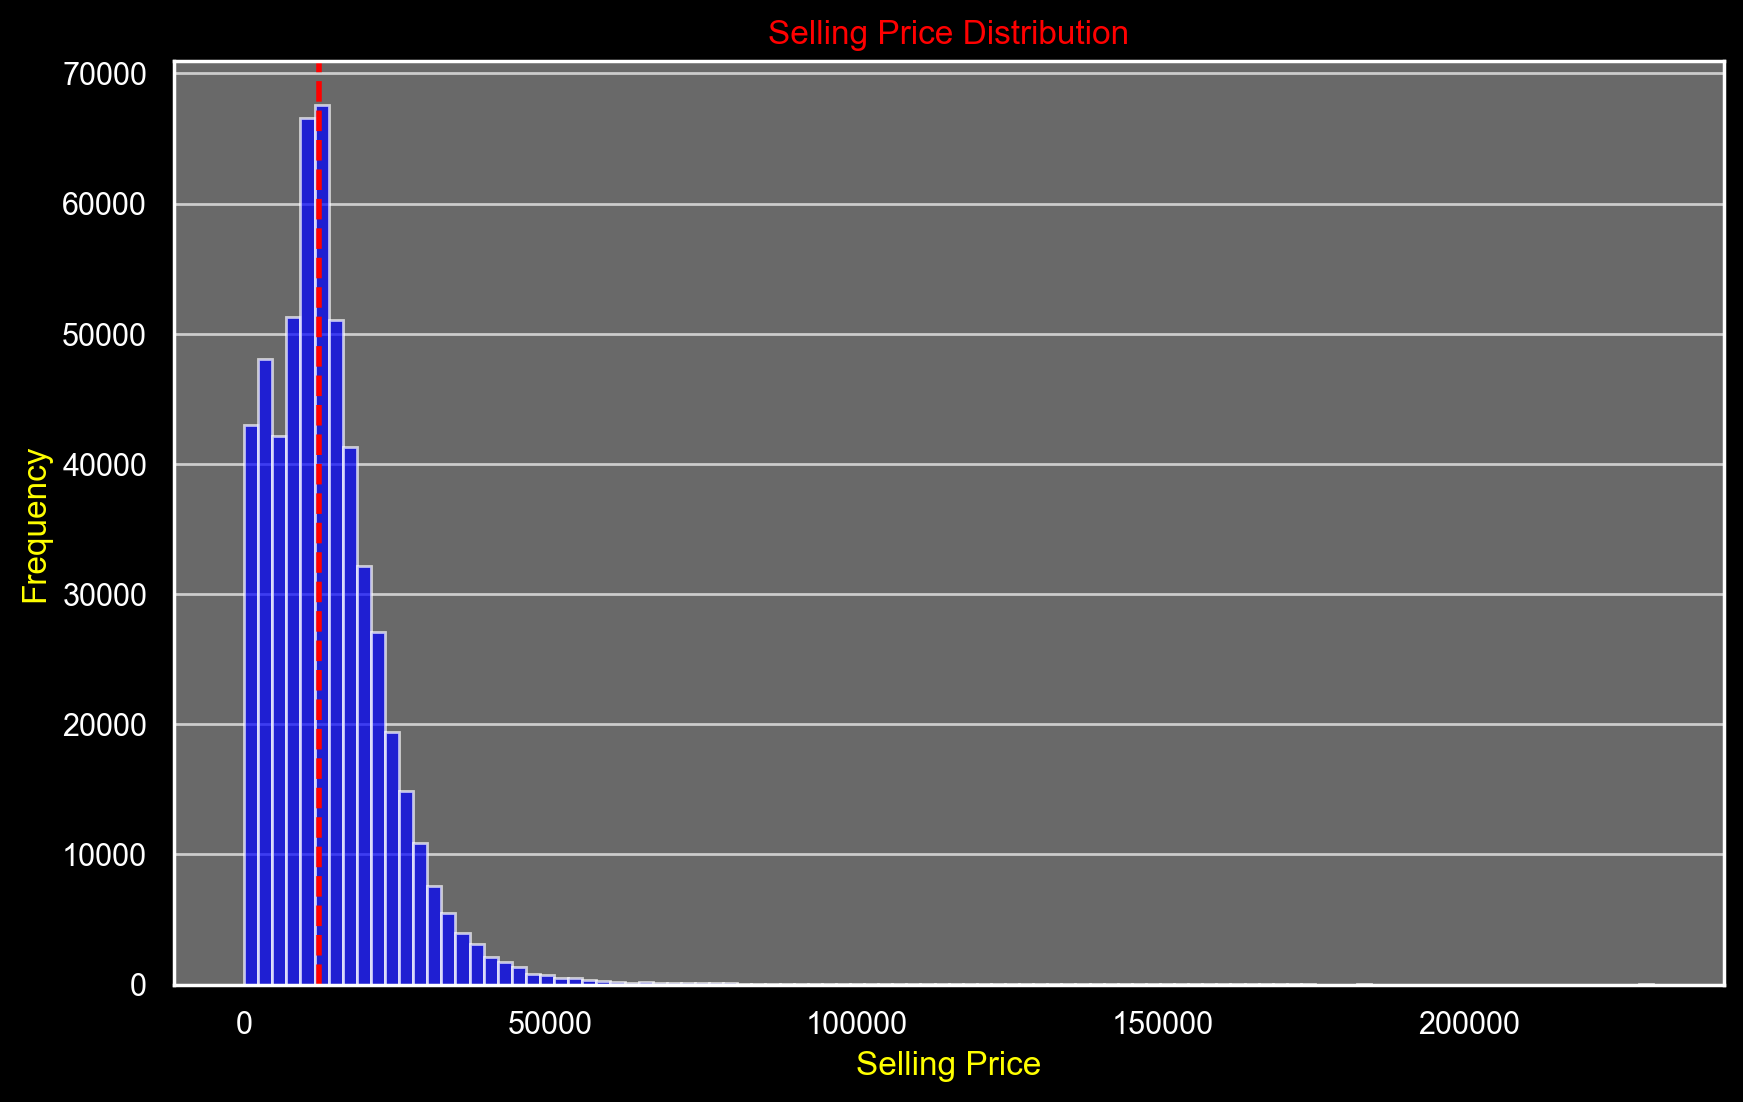

In [1364]:
plt.figure(figsize=(10, 6), facecolor='black')
plt.hist(cleaned_cs['sellingprice'], bins=100, color='blue', edgecolor='white', alpha=0.7)

sellingprice_median = cleaned_cs['sellingprice'].median()

plt.axvline(x=sellingprice_median, color='red', linestyle='dashed', linewidth=2)

plt.title('Selling Price Distribution', color='red')
plt.xlabel('Selling Price', color='yellow')
plt.ylabel('Frequency', color='yellow')

plt.xticks(color='white')
plt.yticks(color='white')

plt.gca().set_facecolor('dimgray')
plt.grid(axis='x')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()


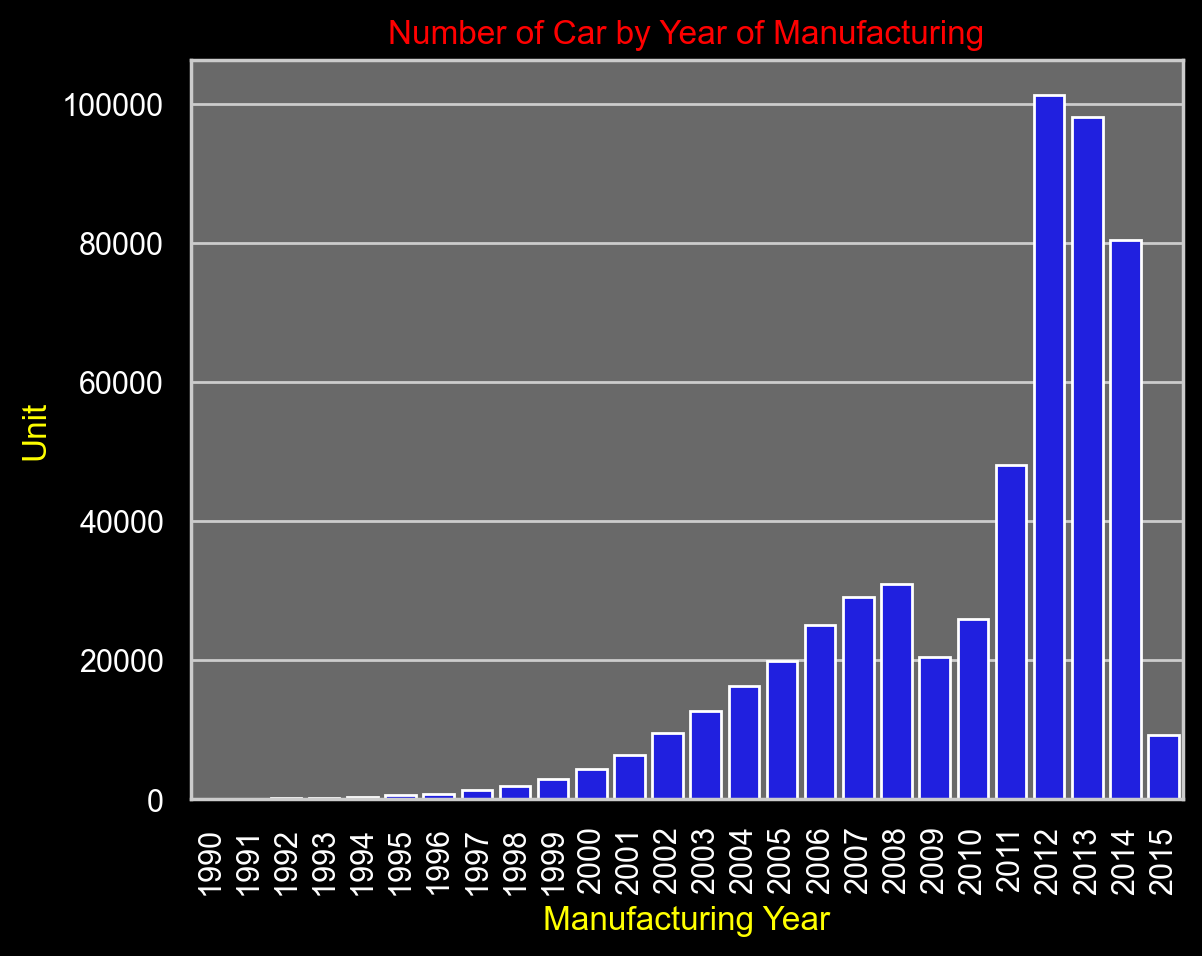

In [1365]:
yearly_counts = cleaned_cs.groupby('year')['make'].count().reset_index()
ax = sns.barplot(x='year', y='make', data=yearly_counts,color='blue')
ax.set_facecolor('dimgrey')
plt.gcf().set_facecolor('black')
plt.title('Number of Car by Year of Manufacturing',color='red')
plt.xlabel('Manufacturing Year',color='yellow')
plt.ylabel('Unit',color='yellow')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xticks(rotation=90)
plt.show()

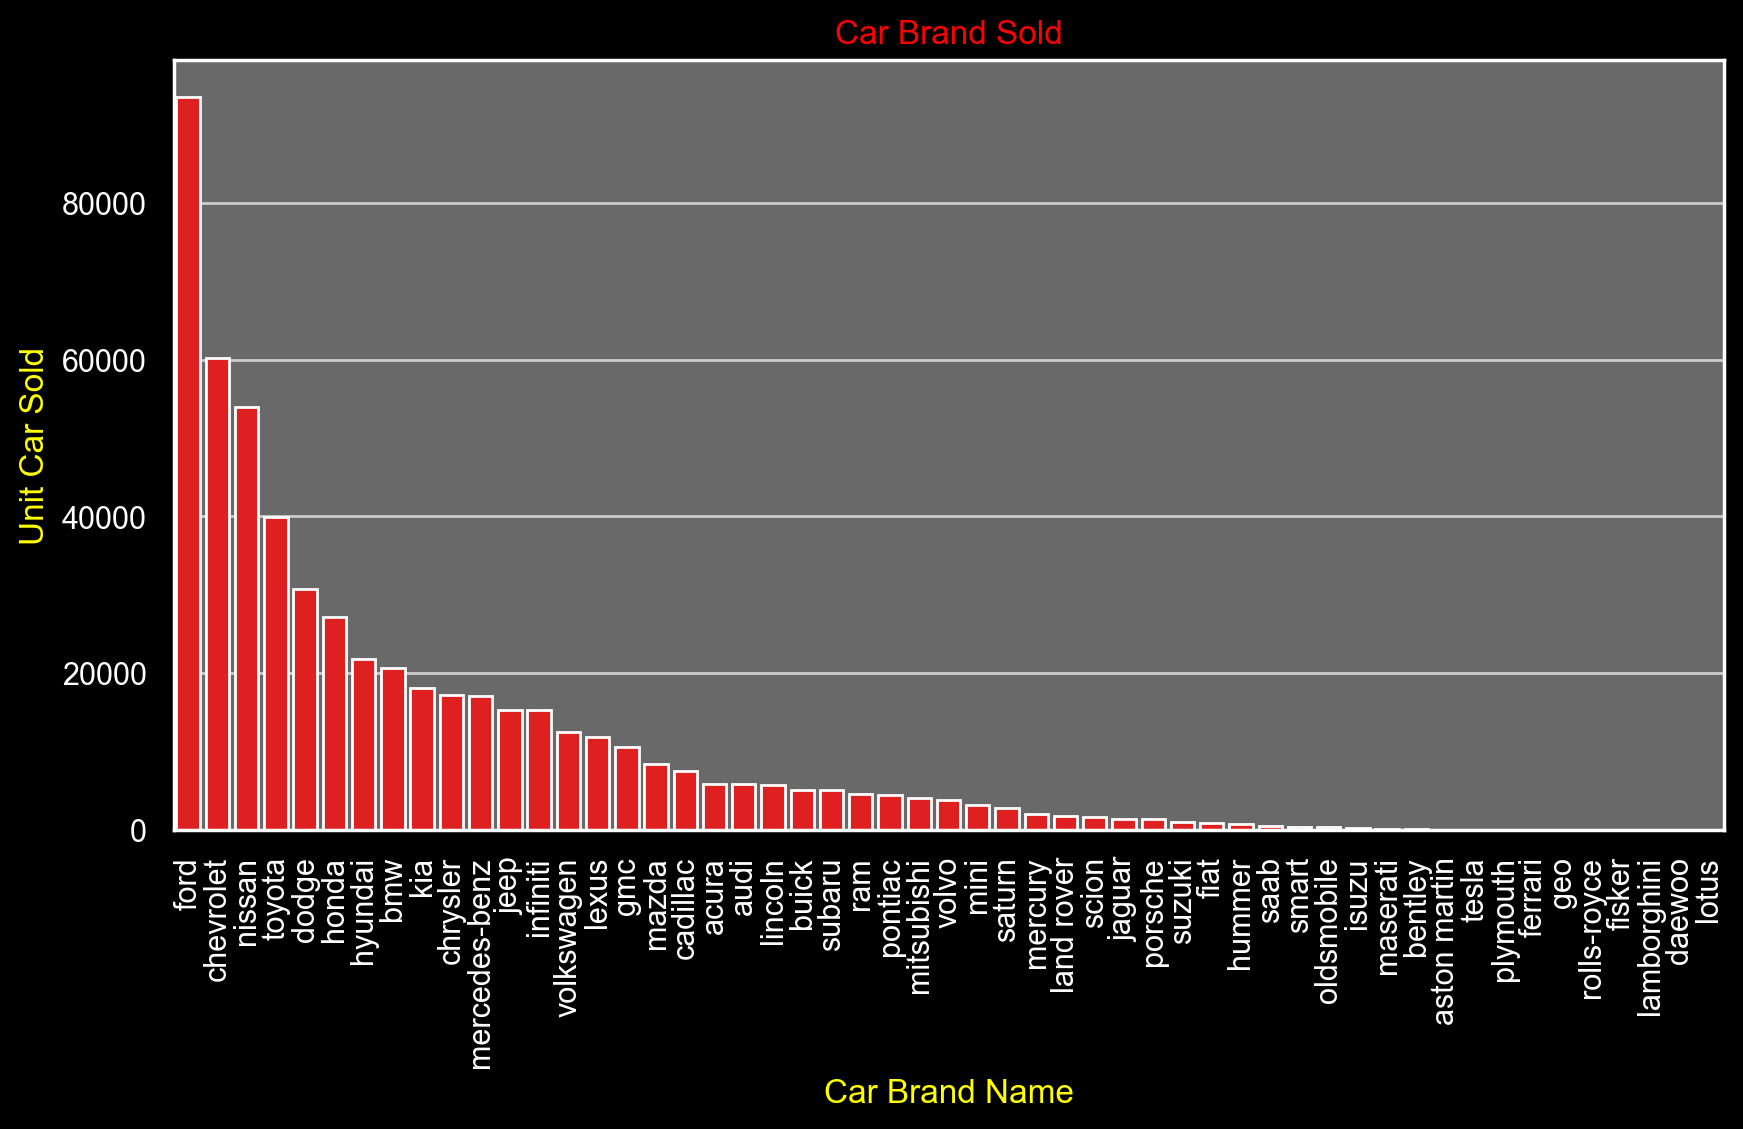

In [1366]:
make_market_share = cleaned_cs.groupby('make')['model'].count().reset_index()
market_share_s = make_market_share.sort_values(by='model', ascending=False)


plt.figure(figsize=(10, 5))
ax = sns.barplot(x='make', y='model', data=market_share_s, color='red')


ax.set_facecolor('dimgray')  
plt.gcf().set_facecolor('black')  


ax.set_title('Car Brand Sold', color='red')
ax.set_xlabel('Car Brand Name', color='yellow')
ax.set_ylabel('Unit Car Sold', color='yellow')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.xticks(rotation=90)

for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()


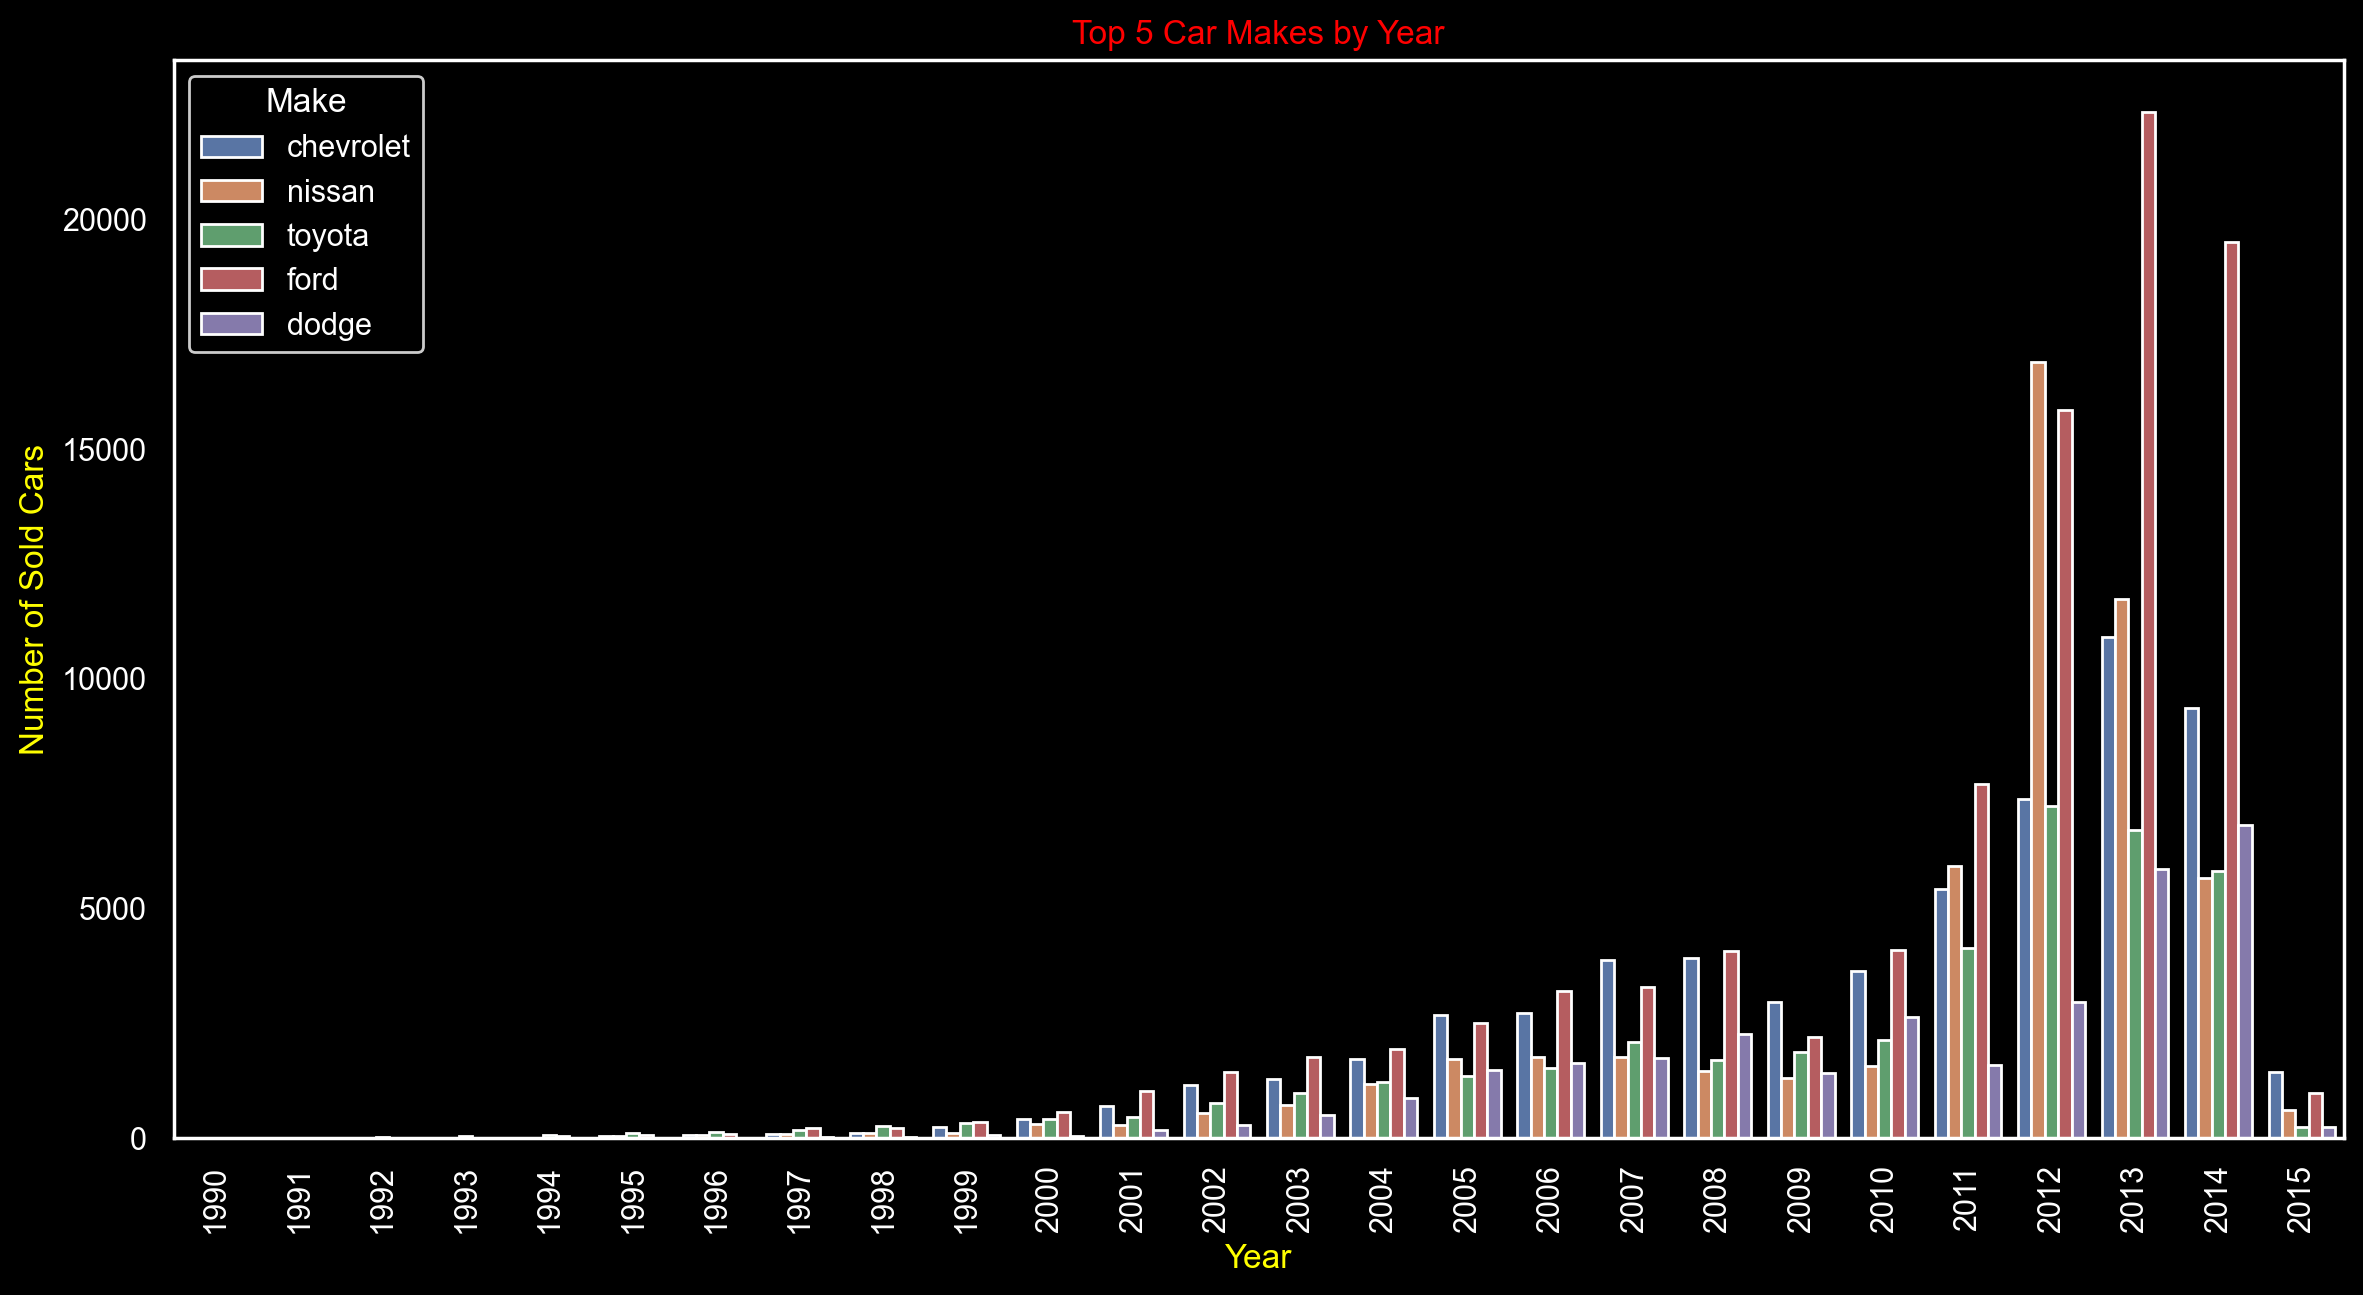

In [1367]:

top_car_makes = cleaned_cs['make'].value_counts().nlargest(5).index

filtered_cs = cleaned_cs[cleaned_cs['make'].isin(top_car_makes)]

yearly_counts = filtered_cs.groupby(['year', 'make']).size().reset_index(name='counts')


plt.figure(figsize=(14, 7))
ax = sns.barplot(x='year', y='counts', hue='make', data=yearly_counts)

ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.title('Top 5 Car Makes by Year', color='red')
plt.xlabel('Year', color='yellow')
plt.ylabel('Number of Sold Cars', color='yellow')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

legend = plt.legend(title='Make', loc='upper left', facecolor='black', edgecolor='white')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')
plt.grid(axis='y') 
plt.xticks(rotation=90)

for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()

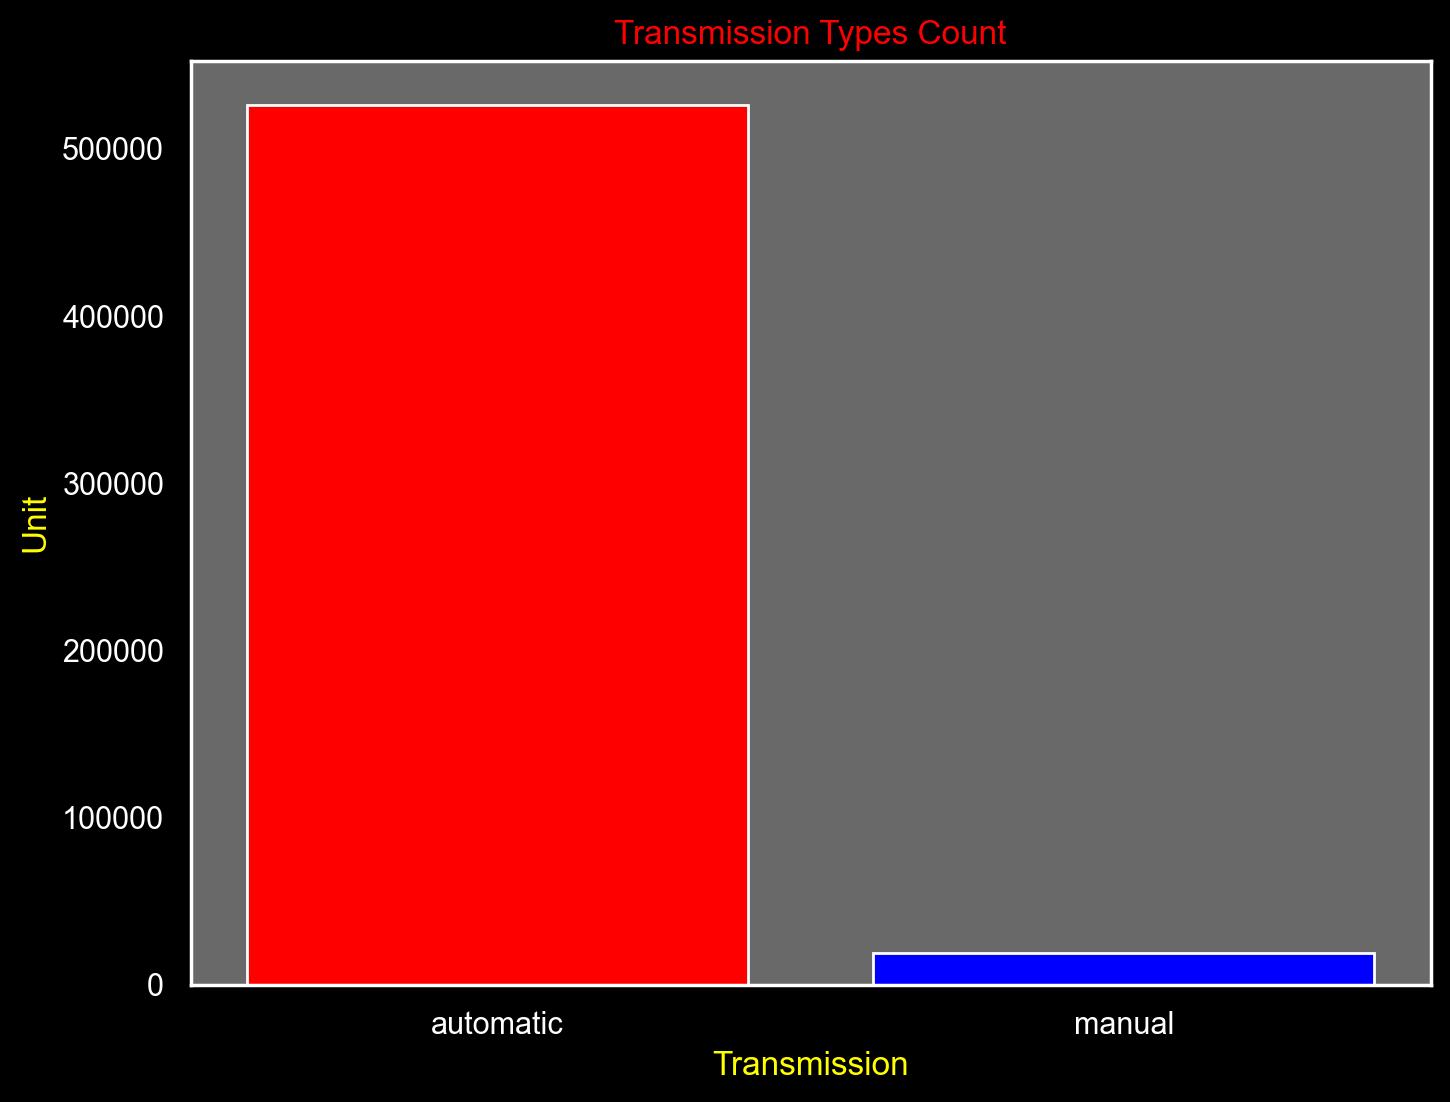

In [1368]:
tsm = cleaned_cs['transmission'].value_counts().reset_index()

plt.figure(figsize=(8, 6))

bars = plt.bar(tsm['transmission'], tsm['count'], color=['red', 'blue'])

ax = plt.gca()

ax.set_facecolor('dimgray')  
plt.gcf().set_facecolor('black')  

plt.title('Transmission Types Count', color='red')
plt.xlabel('Transmission', color='yellow')
plt.ylabel('Unit', color='yellow')
plt.grid(False)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()

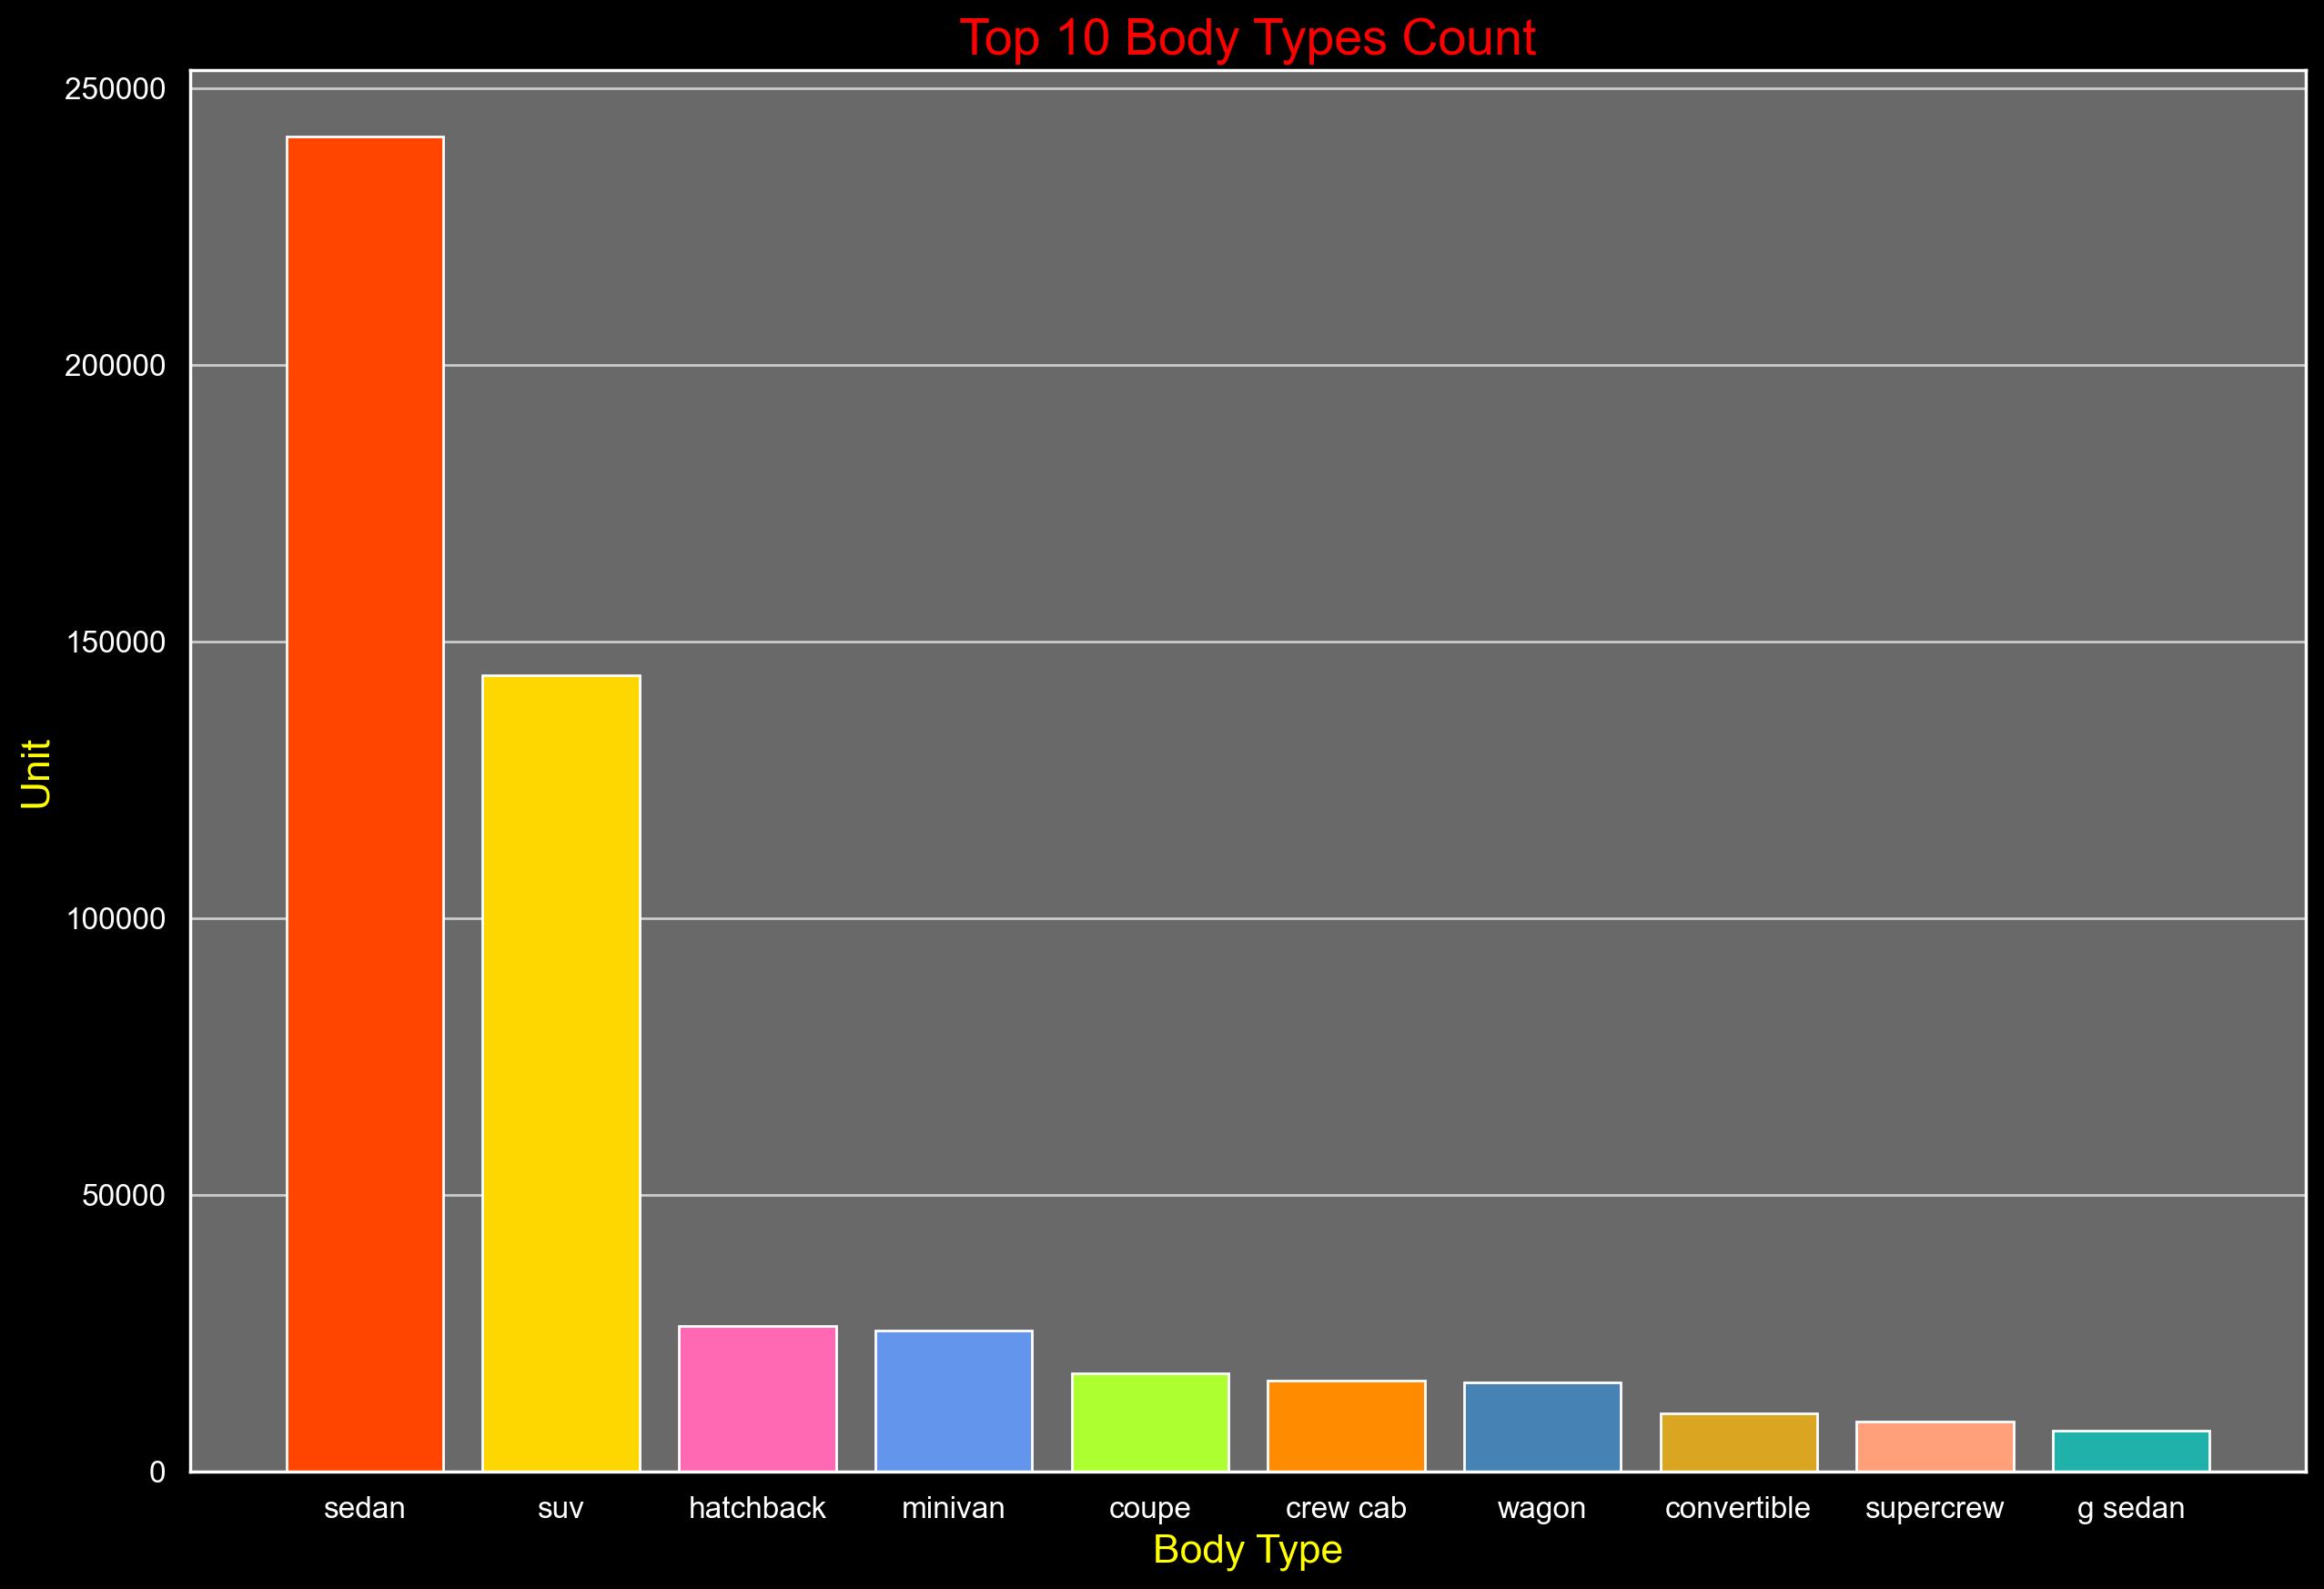

In [1369]:
body = cleaned_cs['body'].value_counts().nlargest(10).reset_index()

plt.figure(figsize=(15, 10))

colors = [
    '#FF4500',  # OrangeRed
    '#FFD700',  # Gold
    '#FF69B4',  # HotPink
    '#6495ED',  # CornflowerBlue
    '#ADFF2F',  # GreenYellow
    '#FF8C00',  # DarkOrange
    '#4682B4',  # SteelBlue
    '#DAA520',  # GoldenRod
    '#FFA07A',  # LightSalmon
    '#20B2AA'   # LightSeaGreen
]

bars = plt.bar(body['body'], body['count'], color=colors)

ax = plt.gca()
ax.set_facecolor('dimgrey')
plt.gcf().set_facecolor('black')

plt.title('Top 10 Body Types Count', color='red', fontsize=20)
plt.xlabel('Body Type', color='yellow', fontsize=16)
plt.ylabel('Unit', color='yellow', fontsize=16)

ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)
plt.grid(axis='x')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()


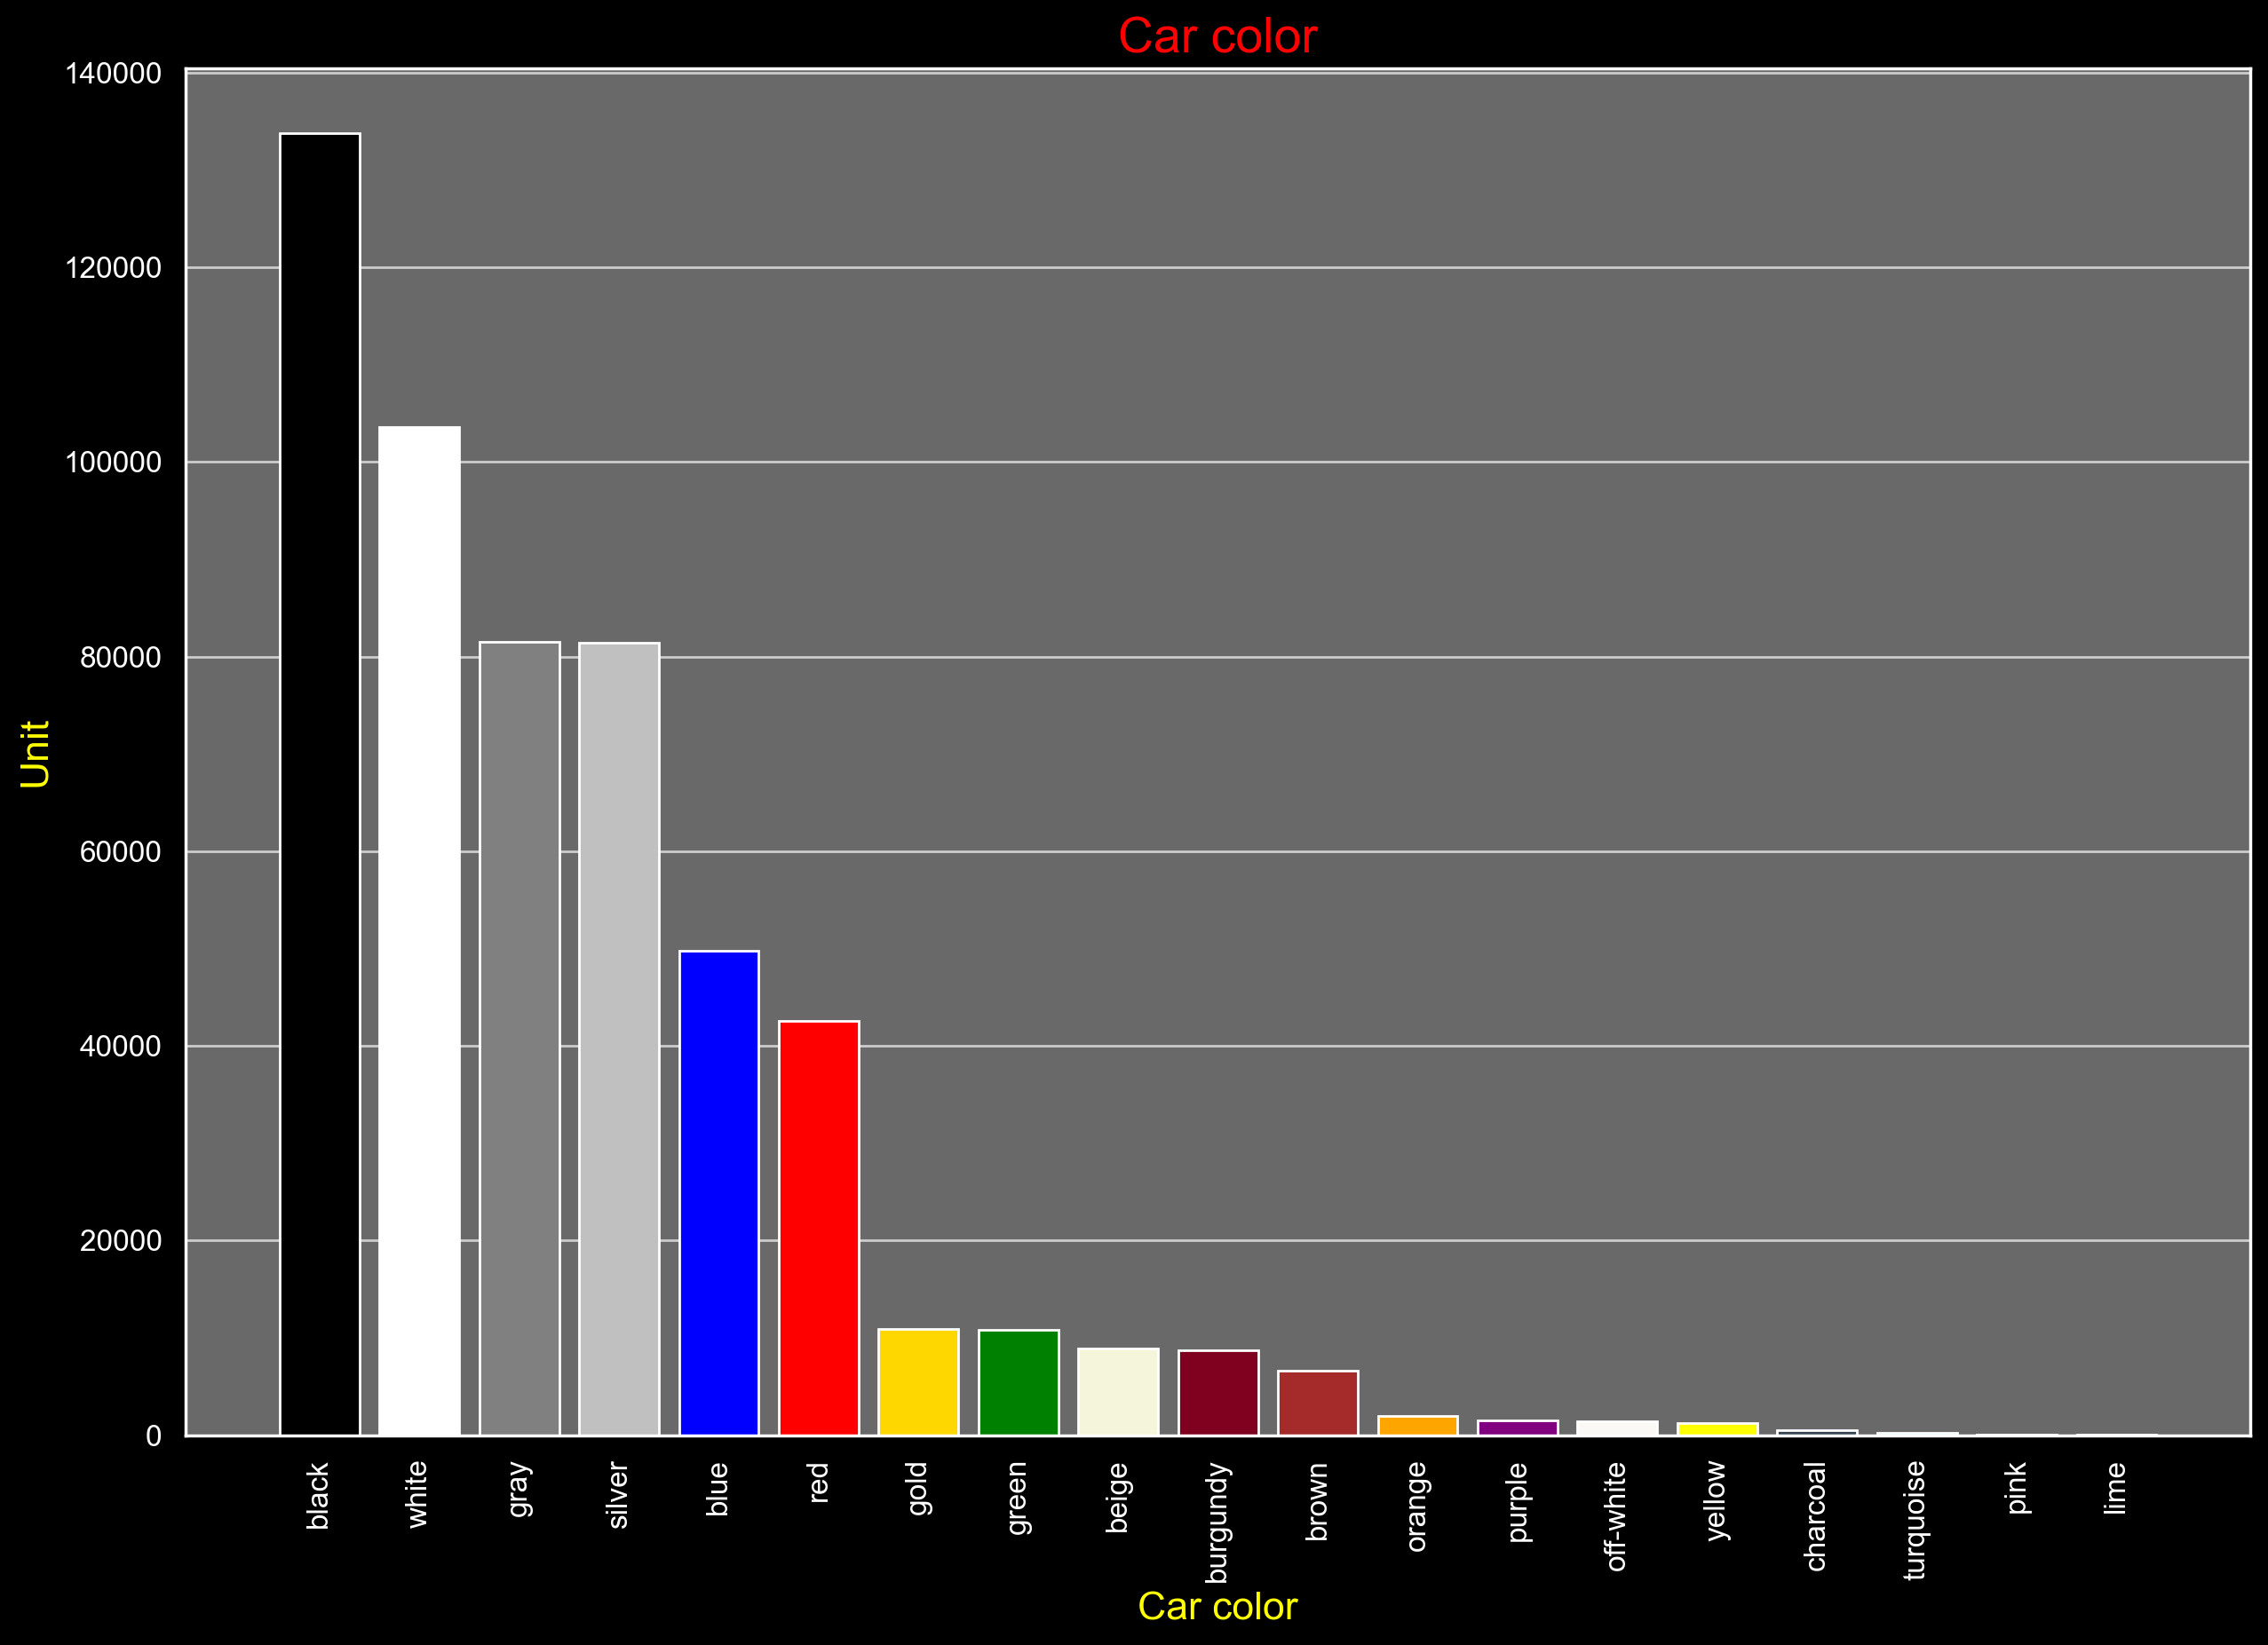

In [1370]:

color_counts = cleaned_cs['color'].value_counts().reset_index()
color_counts.columns = ['color', 'count']

all_car_colors = [
    '#000000',  # black
    '#FFFFFF',  # white
    '#808080',  # gray
    '#C0C0C0',  # silver
    '#0000FF',  # blue
    '#FF0000',  # red
    '#FFD700',  # gold
    '#008000',  # green
    '#F5F5DC',  # beige
    '#800020',  # burgundy
    '#A52A2A',  # brown
    '#FFA500',  # orange
    '#800080',  # purple
    '#FAF9F6',  # off-white
    '#FFFF00',  # yellow
    '#36454F',  # charcoal
    '#40E0D0',  # turquoise
    '#FFC0CB',  # pink
    '#00FF00'   # lime
]

plt.figure(figsize=(15, 10))

bars = plt.bar(color_counts['color'], color_counts['count'], color=all_car_colors[:len(color_counts)])

ax = plt.gca()
ax.set_facecolor('dimgrey')
plt.gcf().set_facecolor('black')

plt.title('Car color', color='red', fontsize=20)
plt.xlabel('Car color', color='yellow', fontsize=16)
plt.ylabel('Unit', color='yellow', fontsize=16)

ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)
plt.xticks(rotation=90)
plt.grid(axis='x')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()


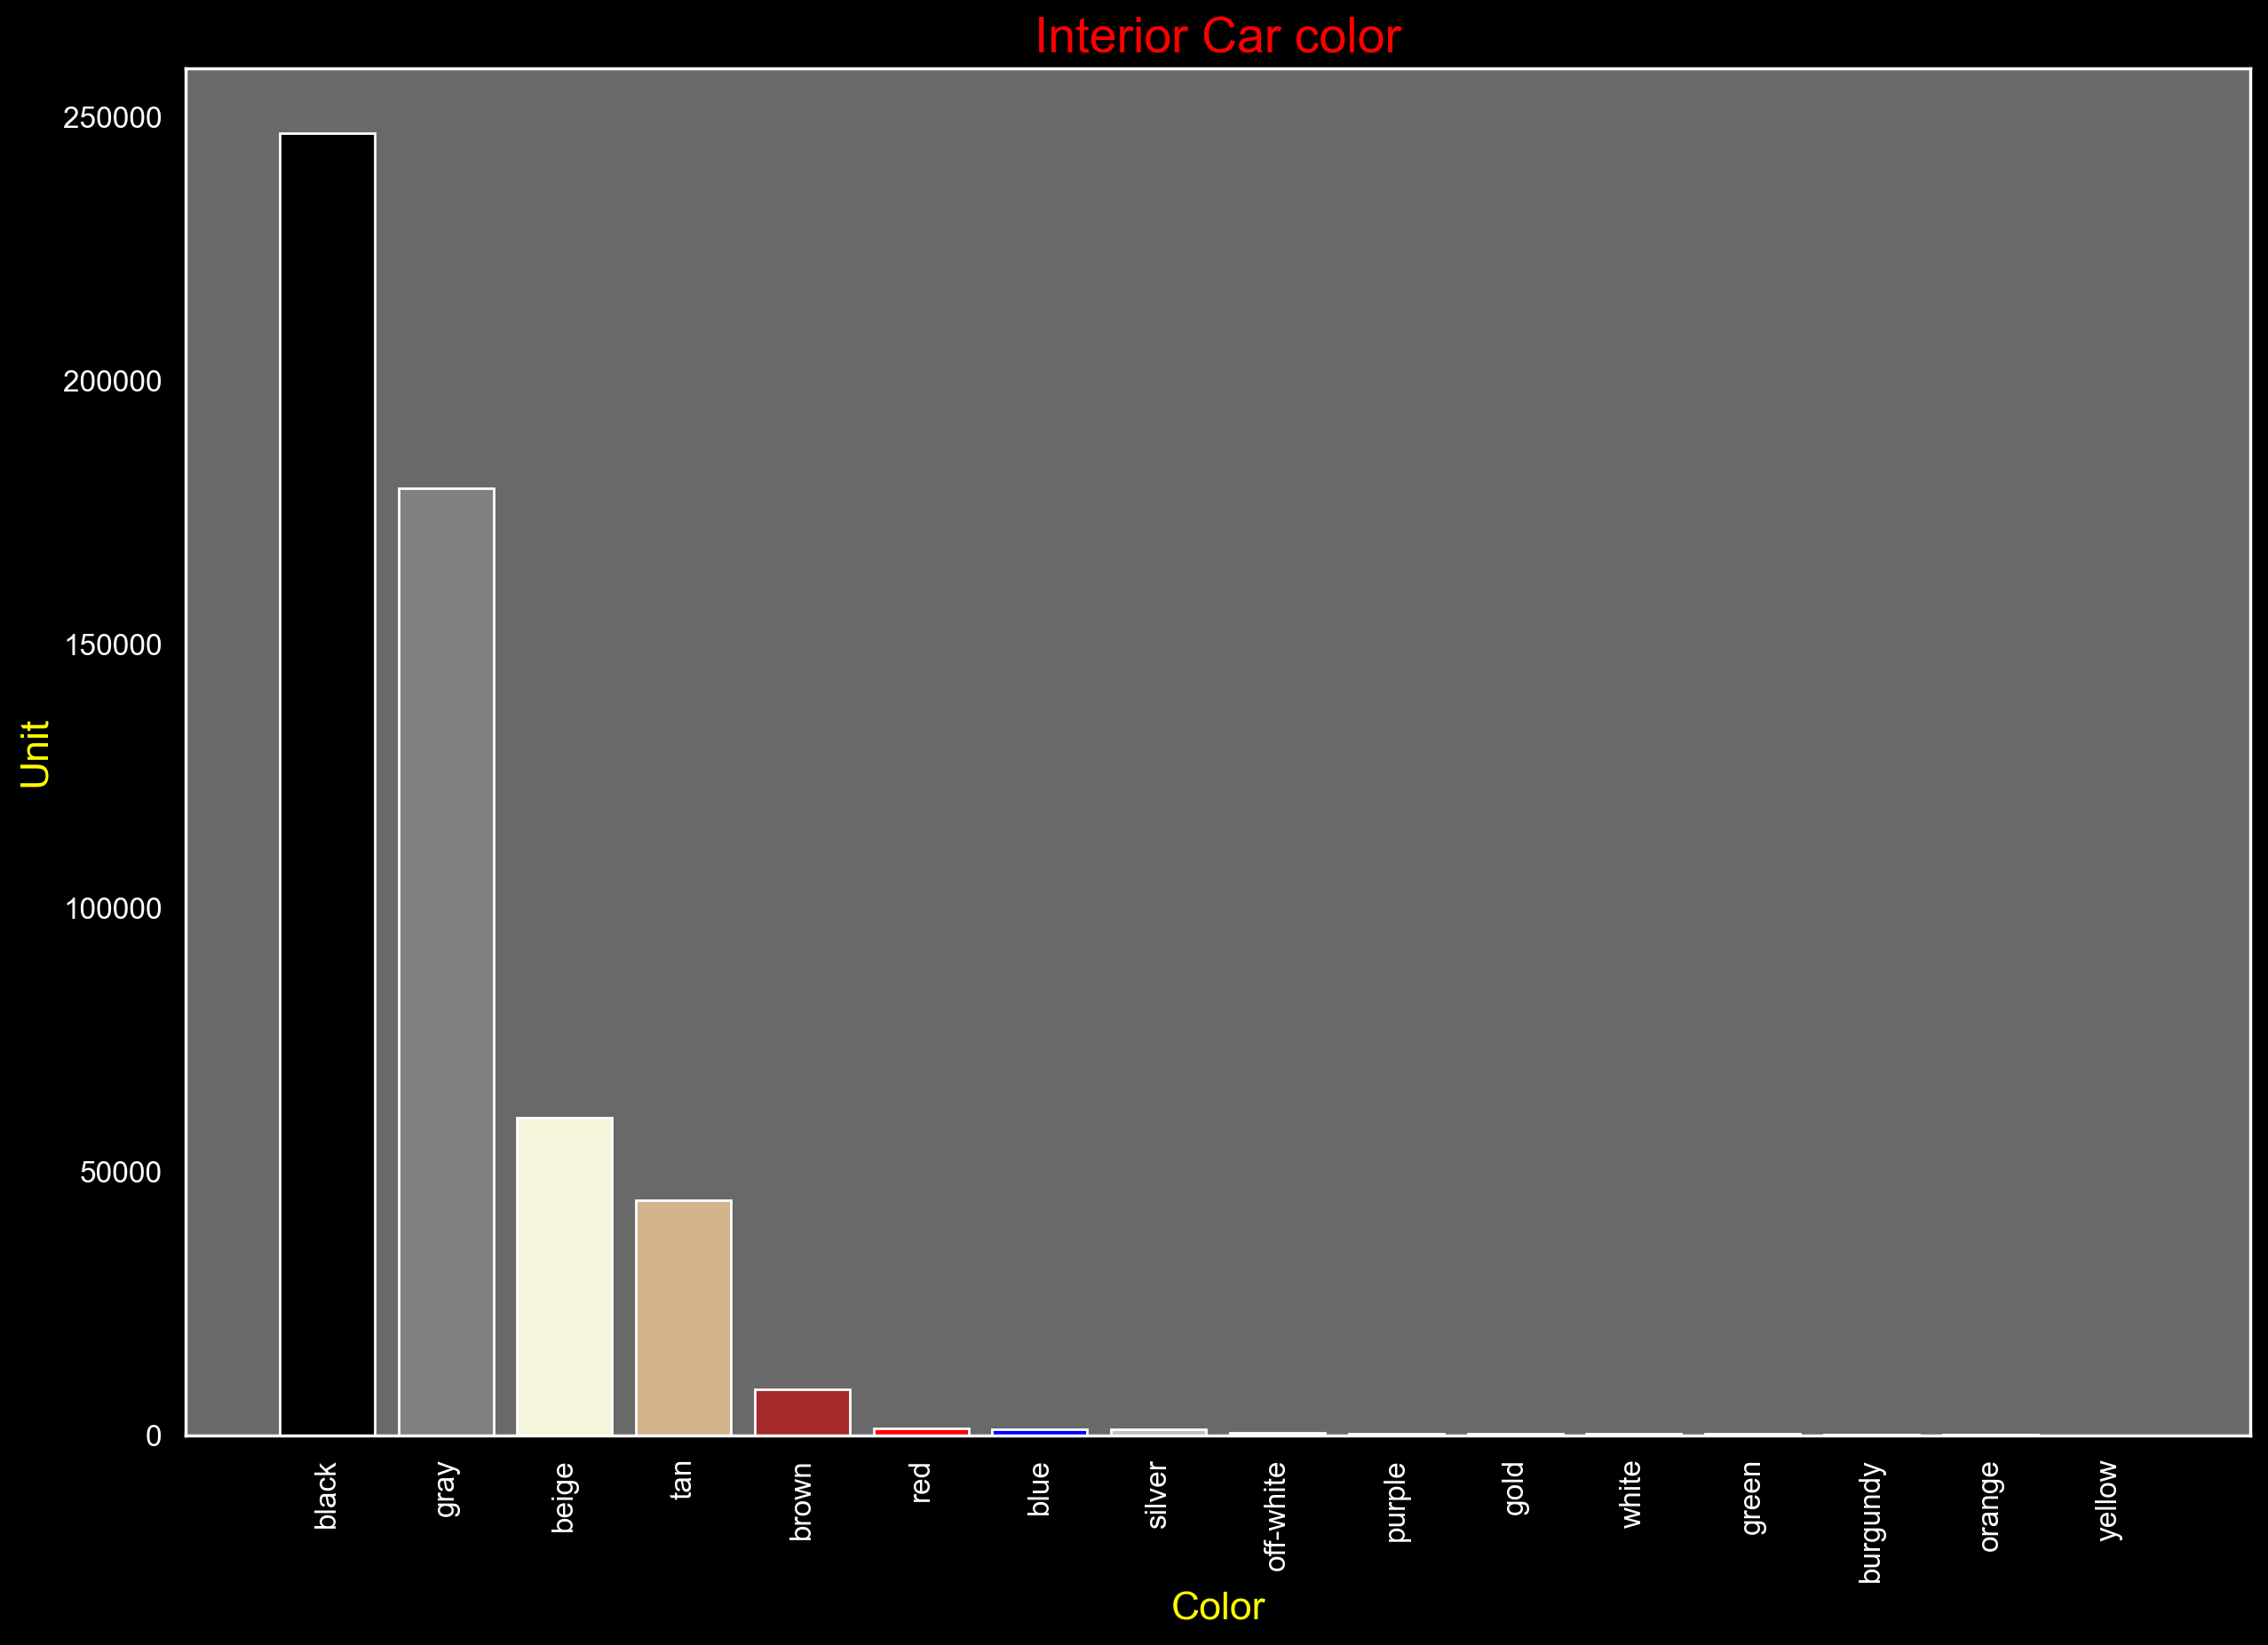

In [1371]:
interior_color_counts = cleaned_cs['interior'].value_counts().reset_index()
interior_color = ['#000000', '#808080', '#f5f5dc', '#d2b48c', '#a52a2a', '#ff0000', '#0000ff', '#c0c0c0', '#f5f5f5', '#800080', '#ffd700', '#ffffff', '#008000', '#800020', '#ffa500', '#ffff00']

plt.figure(figsize=(15, 10))
bars = plt.bar(interior_color_counts['interior'], interior_color_counts['count'], color=interior_color[:len(color_counts)])

ax = plt.gca()
ax.set_facecolor('dimgray')
plt.gcf().set_facecolor('black')

plt.title('Interior Car color', color='red', fontsize=20)
plt.xlabel('Color', color='yellow', fontsize=16)
plt.ylabel('Unit', color='yellow', fontsize=16)

ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)
plt.xticks(rotation=90)
plt.grid()
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()

In [1372]:
model = cleaned_cs.groupby('model').size().reset_index(name='count')
model = model.sort_values(by='count', ascending=False)

print(model)


          model  count
64       altima  19349
260       f-150  14479
288      fusion  12945
121       camry  12545
244      escape  11861
..          ...    ...
24   458 italia      1
23    420-class      1
22    400-class      1
650      spirit      1
392    le baron      1

[772 rows x 2 columns]


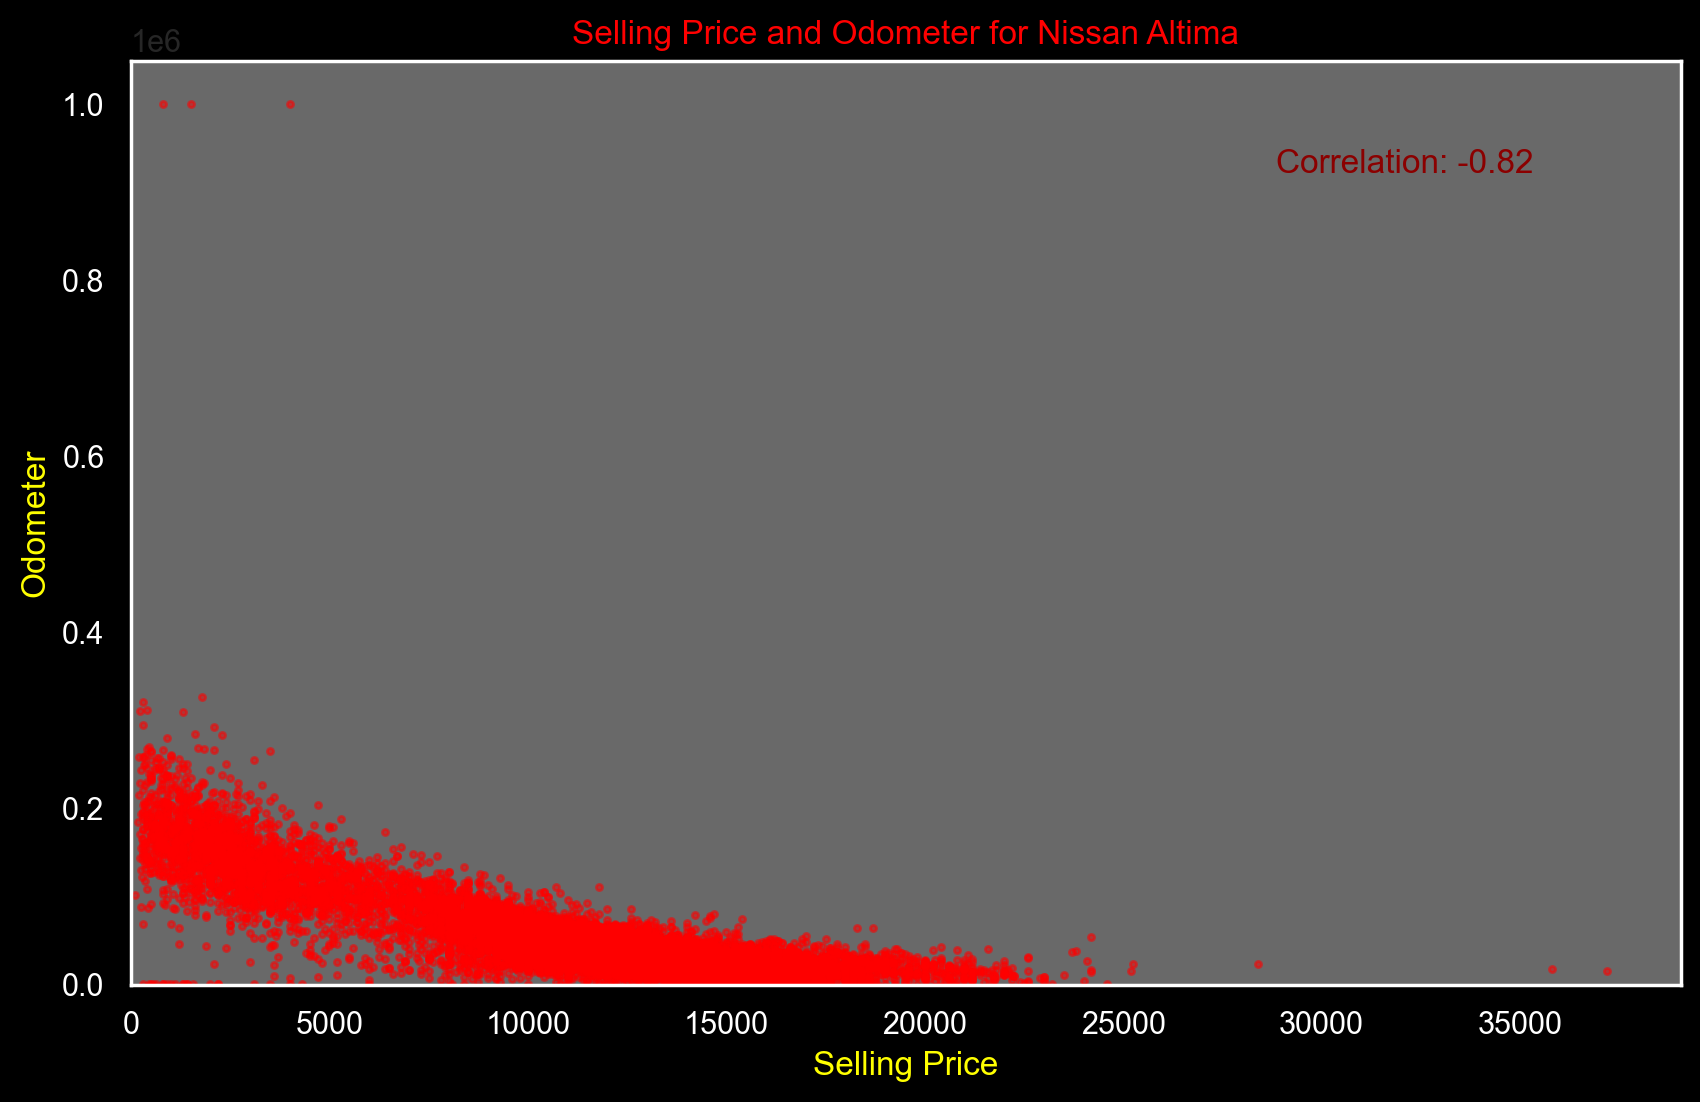

In [1373]:
altima = cleaned_cs[cleaned_cs['model'] == 'altima']
altima_corr = altima['sellingprice'].corr(altima['odometer'])
plt.figure(figsize=(10, 6), facecolor='black')
plt.scatter(x=altima['sellingprice'], y=altima['odometer'], s=5, c='red', alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Selling Price', color='yellow')
plt.ylabel('Odometer', color='yellow')
plt.title('Selling Price and Odometer for Nissan Altima', color='red')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('dimgrey')
plt.grid(False)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('white')


plt.text(x=altima['sellingprice'].max() - (altima['sellingprice'].max() - altima['sellingprice'].min()) * 0.05, 
         y=altima['odometer'].max() - (altima['odometer'].max() - altima['odometer'].min()) * 0.05, 
         s=f'Correlation: {altima_corr:.2f}', 
         fontsize=12, 
         color='darkred',
         horizontalalignment='right',
         verticalalignment='top')

plt.show()


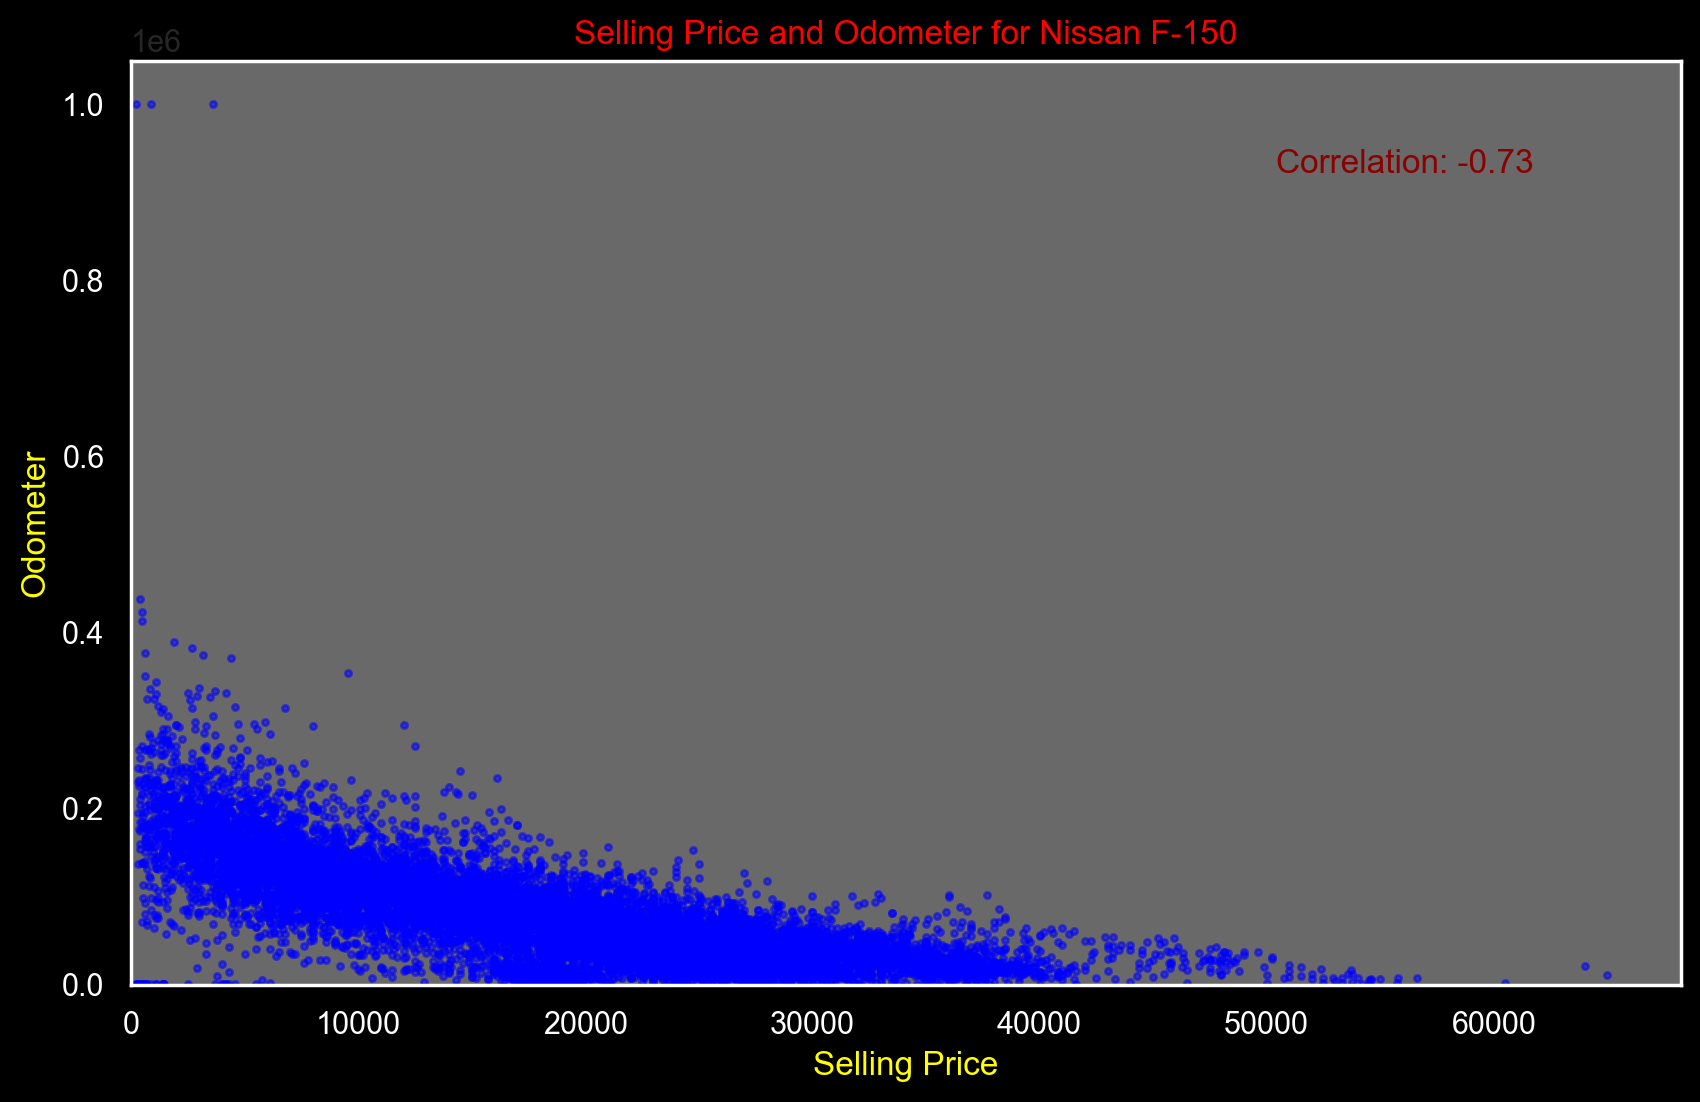

In [1374]:
f150 = cleaned_cs[cleaned_cs['model'] == 'f-150']
f150_corr = f150['sellingprice'].corr(f150['odometer'])
plt.figure(figsize=(10, 6), facecolor='black')
plt.scatter(x=f150['sellingprice'],y= f150['odometer'], s=5, c='blue', alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Selling Price', color='yellow')
plt.ylabel('Odometer', color='yellow')
plt.title('Selling Price and Odometer for Nissan F-150', color='red')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('dimgrey')
plt.grid(False)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('white')


plt.text(x=f150['sellingprice'].max() - (f150['sellingprice'].max() - f150['sellingprice'].min()) * 0.05, 
         y=f150['odometer'].max() - (f150['odometer'].max() - f150['odometer'].min()) * 0.05, 
         s=f'Correlation: {f150_corr:.2f}', 
         fontsize=12, 
         color='darkred',
         horizontalalignment='right',
         verticalalignment='top')

plt.show()




In [1375]:
tm = cleaned_cs[['make', 'model', 'color']]
tm_gs = tm.groupby(['make', 'model', 'color']).size().reset_index(name='count_color')
top_makes = tm_gs.groupby('make')['count_color'].sum().nlargest(5).index.tolist()
top_5_tm_gs = tm_gs[tm_gs['make'].isin(top_makes)]
top_5_tm_gs = top_5_tm_gs.sort_values(by=['make', 'model', 'count_color'], ascending=[True, True, False])

fig = px.treemap(top_5_tm_gs, path=['make', 'model', 'color'], values='count_color',
                 color='count_color', color_continuous_scale='Inferno', 
                 title='Top 5 Brands by Model and Color Count',
                 width=1300, height=1000)

fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=0),  
    paper_bgcolor='black',  
    font=dict(color='red') 
)

fig.show()


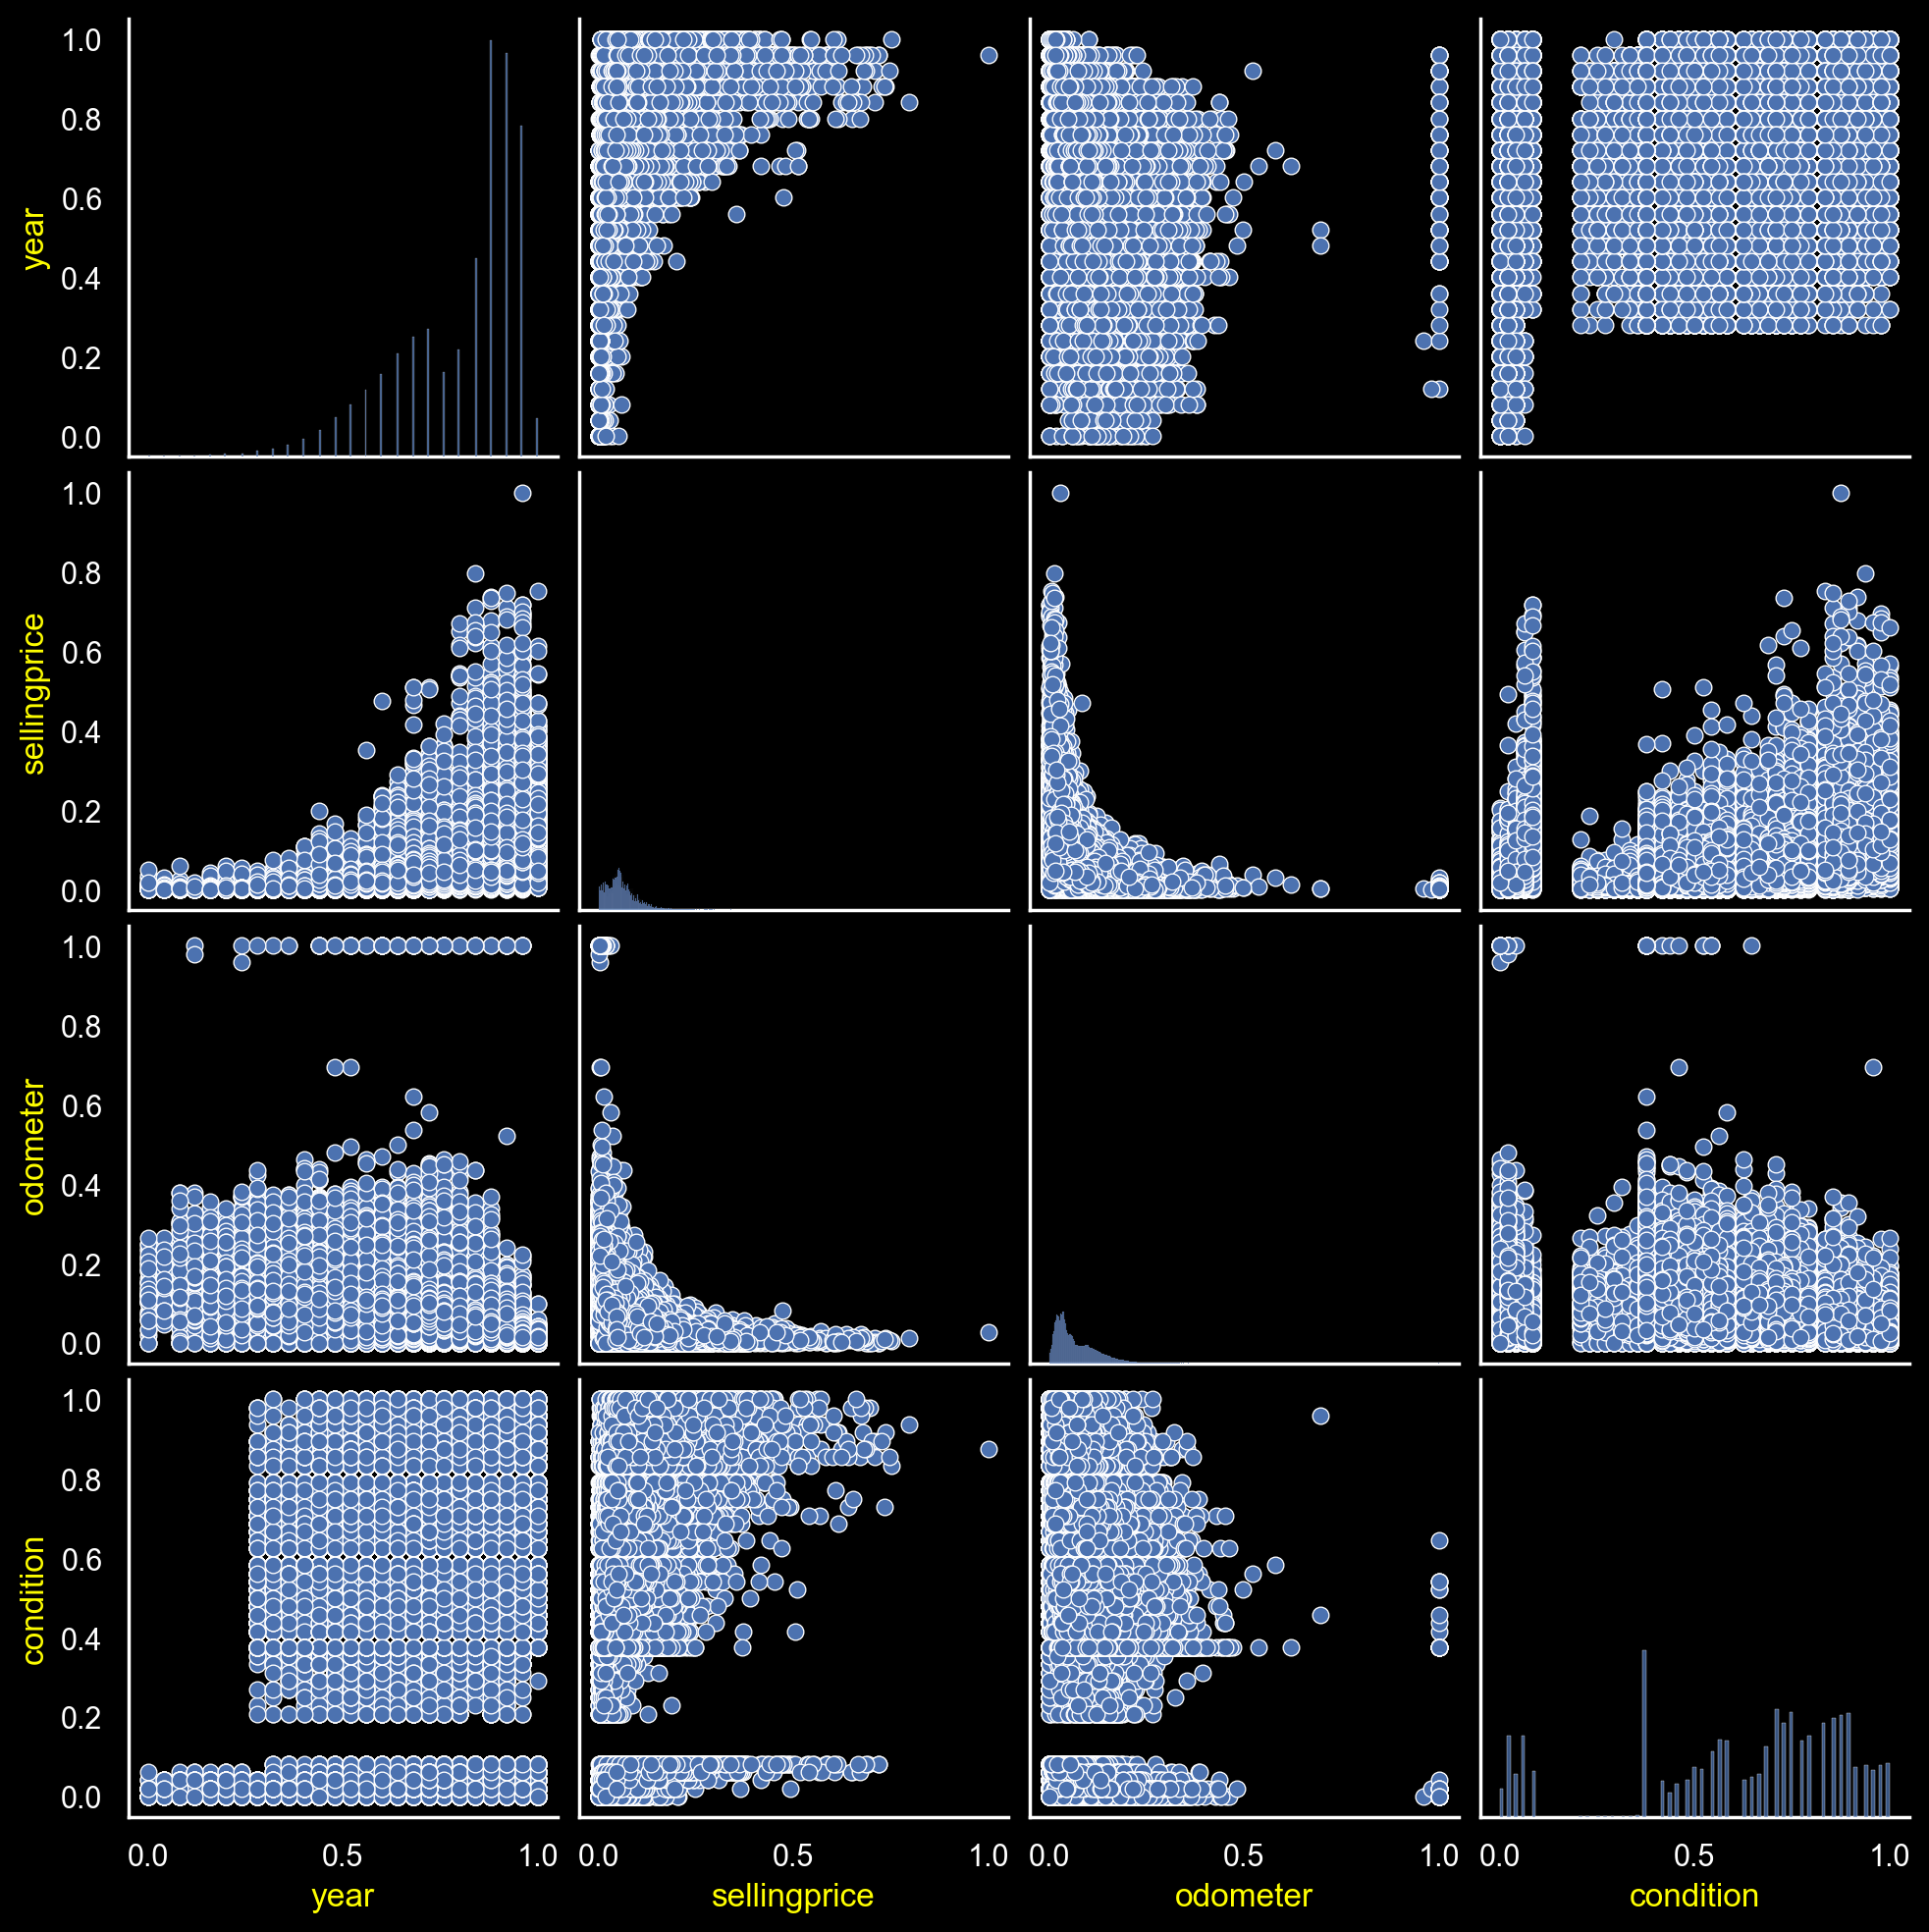

In [1376]:
re = cleaned_cs[['year', 'sellingprice', 'odometer', 'condition']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(re)
scaled_df = pd.DataFrame(scaled_data, columns=re.columns)

g = sns.pairplot(scaled_df)

for ax in g.axes.flatten():
    ax.set_title('')
    ax.grid(False)
    ax.set_facecolor('black')  
    ax.xaxis.label.set_color('yellow')
    ax.yaxis.label.set_color('yellow')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
   
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

plt.gcf().set_facecolor('black')

plt.show()


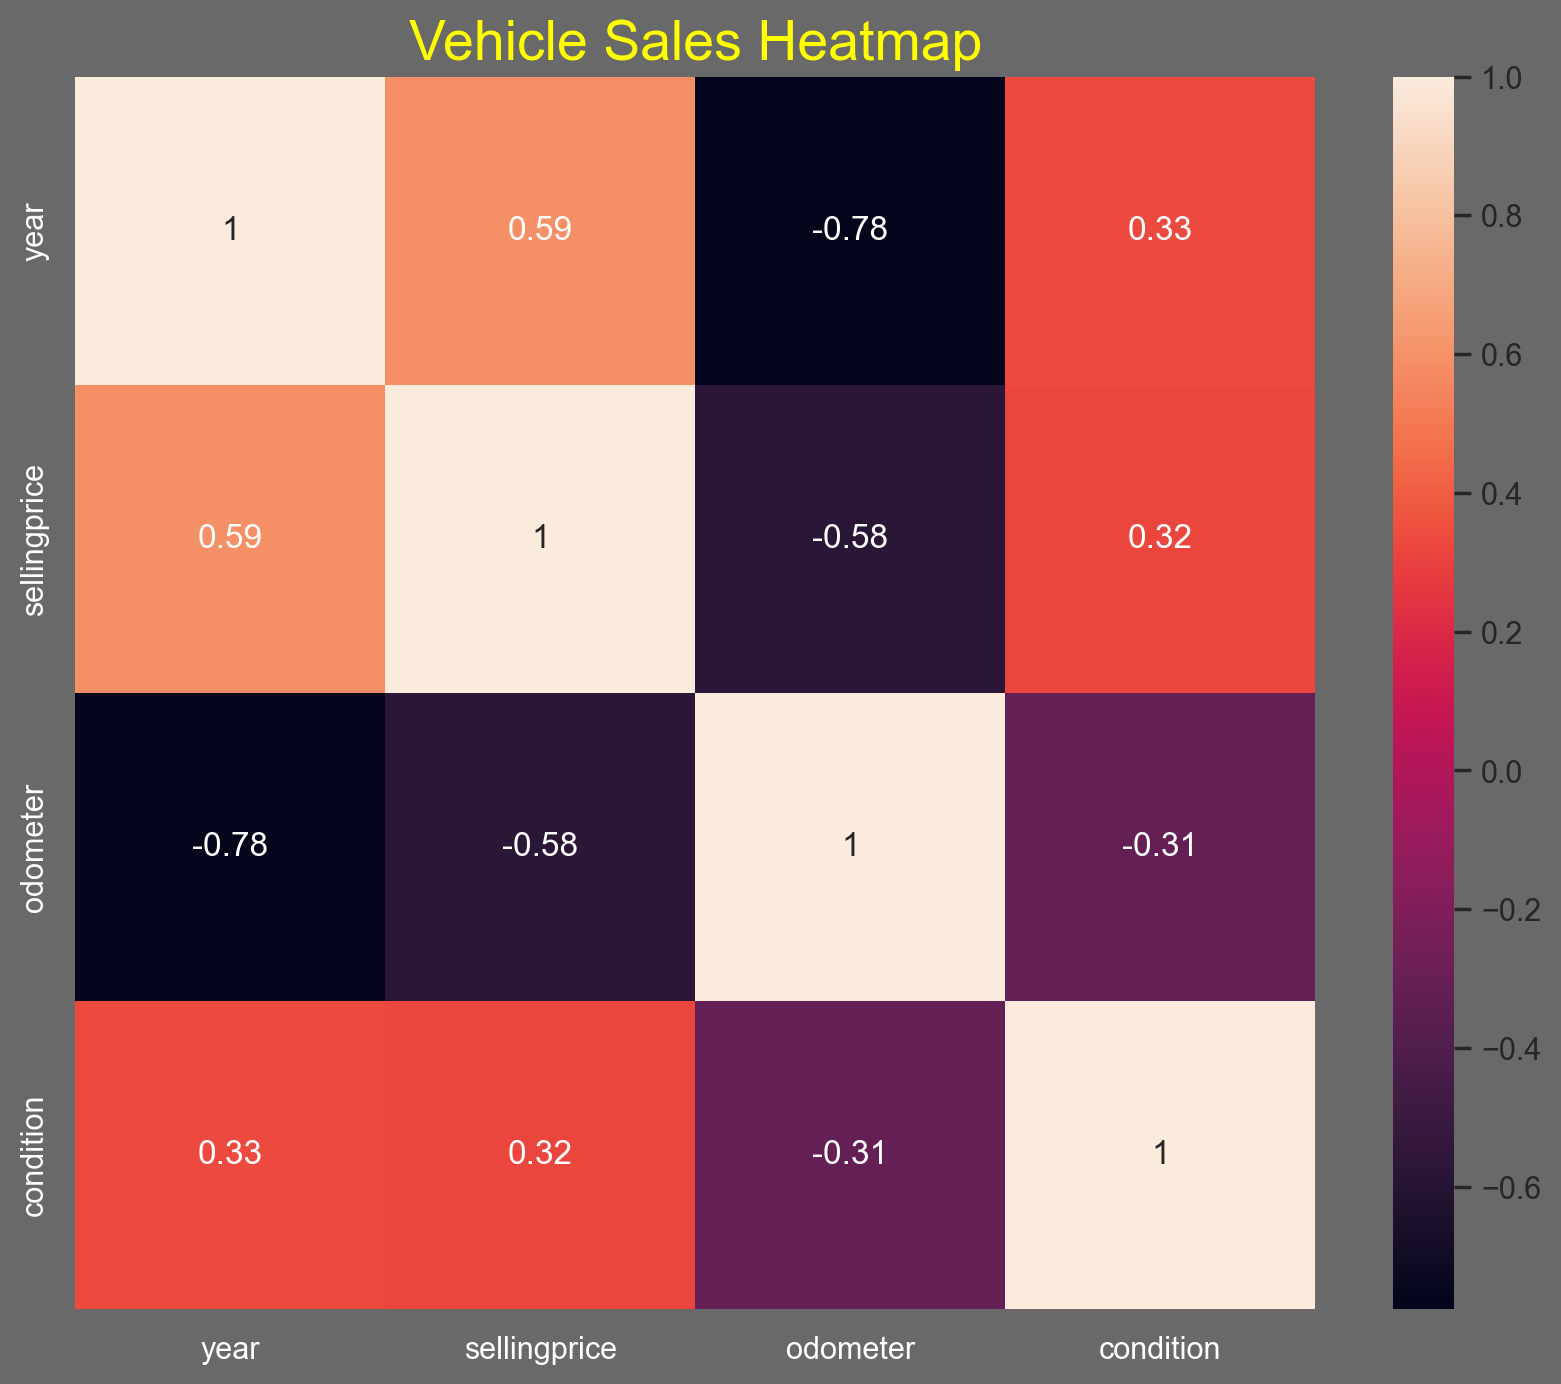

In [1377]:
re_corr = cleaned_cs[['year','sellingprice','odometer','condition']].corr()
plt.figure(figsize=(10, 8),facecolor='dimgrey',)
sns.heatmap(re_corr, annot=True, cmap='rocket')
plt.title('Vehicle Sales Heatmap',color='yellow',fontsize=20)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

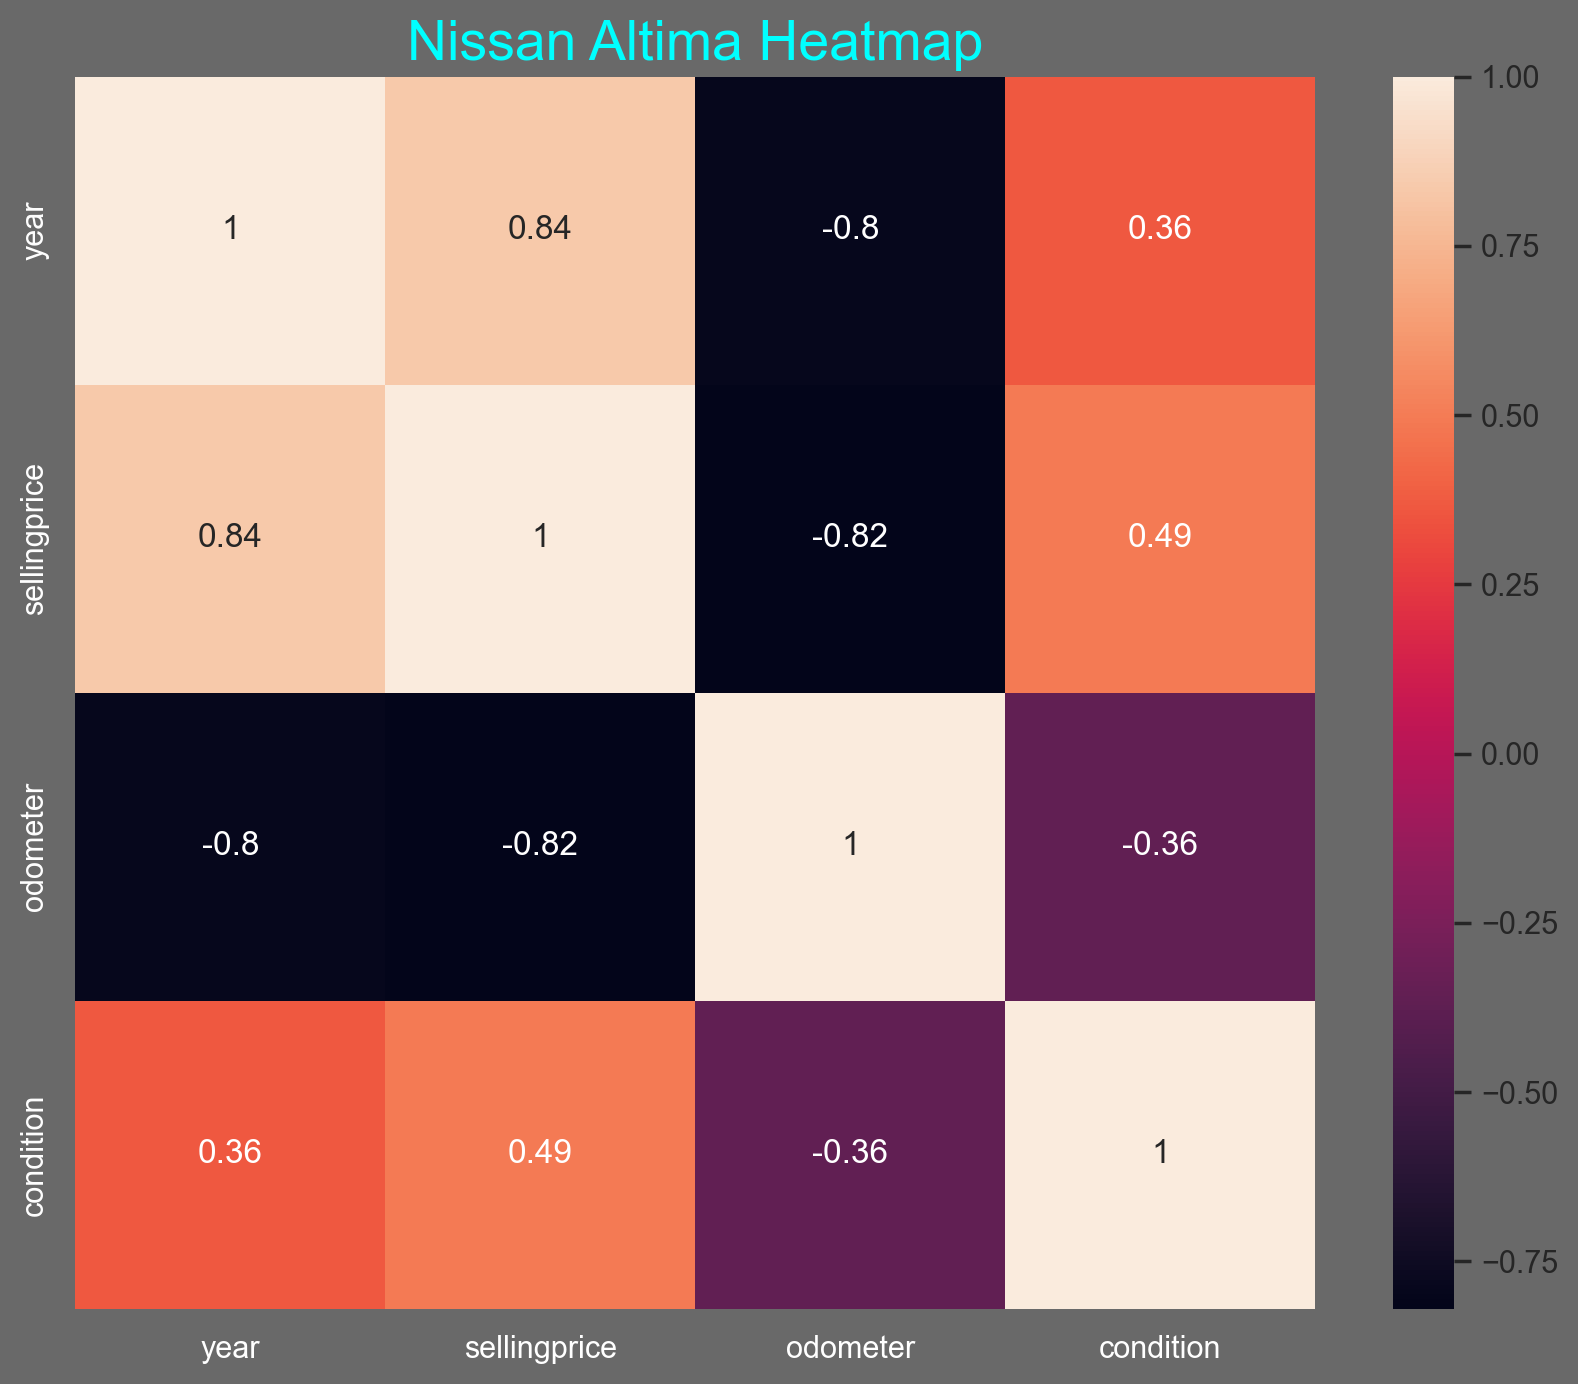

In [1378]:
altima = cleaned_cs[cleaned_cs['model'] == 'altima']
altima_corr = altima[['year','sellingprice','odometer','condition']].corr()
plt.figure(figsize=(10, 8),facecolor='dimgrey')
sns.heatmap(altima_corr, annot=True, cmap='rocket')
plt.title('Nissan Altima Heatmap',color='Cyan',fontsize=20)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [1379]:
country = cleaned_cs[['make', 'model', 'color', 'state']]
state_c = country.groupby(['state', 'make', 'model', 'color']).size().reset_index()
state_c = state_c.groupby('state').sum().reset_index()
state_c['state'] = state_c['state'].str.upper()
state_c = state_c.rename(columns={0: 'car_count'})
state_c['country'] = 'USA'

# Dictionary of state abbreviations and their coordinates
state_abv_coords = {
    'AL': (32.806671, -86.791130), 'AK': (61.370716, -152.404419), 'AZ': (33.729759, -111.431221),
    'AR': (34.969704, -92.373123), 'CA': (36.116203, -119.681564), 'CO': (39.059811, -105.311104),
    'CT': (41.597782, -72.755371), 'DE': (39.318523, -75.507141), 'FL': (27.766279, -81.686783),
    'GA': (33.040619, -83.643074), 'HI': (21.094318, -157.498337), 'ID': (44.240459, -114.478828),
    'IL': (40.349457, -88.986137), 'IN': (39.849426, -86.258278), 'IA': (42.011539, -93.210526),
    'KS': (38.526600, -96.726486), 'KY': (37.668140, -84.670067), 'LA': (31.169546, -91.867805),
    'ME': (44.693947, -69.381927), 'MD': (39.063946, -76.802101), 'MA': (42.230171, -71.530106),
    'MI': (43.326618, -84.536095), 'MN': (45.694454, -93.900192), 'MS': (32.741646, -89.678696),
    'MO': (38.456085, -92.288368), 'MT': (46.921925, -110.454353), 'NE': (41.125370, -98.268082),
    'NV': (38.313515, -117.055374), 'NH': (43.452492, -71.563896), 'NJ': (40.298904, -74.521011),
    'NM': (34.840515, -106.248482), 'NY': (42.165726, -74.948051), 'NC': (35.630066, -79.806419),
    'ND': (47.528912, -99.784012), 'OH': (40.388783, -82.764915), 'OK': (35.565342, -96.928917),
    'OR': (44.572021, -122.070938), 'PA': (40.590752, -77.209755), 'RI': (41.680893, -71.511780),
    'SC': (33.856892, -80.945007), 'SD': (44.299782, -99.438828), 'TN': (35.747845, -86.692345),
    'TX': (31.054487, -97.563461), 'UT': (40.150032, -111.862434), 'VT': (44.045876, -72.710686),
    'VA': (37.769337, -78.169968), 'WA': (47.400902, -121.490494), 'WV': (38.491226, -80.954456),
    'WI': (44.268543, -89.616508), 'WY': (42.755966, -107.302490)
}

# Create choropleth
fig = px.choropleth(state_c,
                    locations='state',
                    locationmode='USA-states',
                    color='car_count',
                    scope='usa',
                    color_continuous_scale='Inferno'  
                    )

for state, coord in state_abv_coords.items():
    fig.add_scattergeo(
        lon=[coord[1]],
        lat=[coord[0]],
        text=state,
        mode='text',
        textfont=dict(color='white', size=10, family='Arial', weight='bold'),
        showlegend=False
    )

fig.update_layout(
    title=dict(
        text='Vehicle Sales in the USA',
        x=0.5,
        y=0.95,
        xanchor='center',
        yanchor='top',
        font=dict(color='red', size=20, family='Arial', weight='bold')
    ),
    coloraxis_colorbar=dict(
        title=dict(text='Number of Cars', font=dict(color='yellow')),
        tickfont=dict(color='white')
    ),
    geo=dict(bgcolor='black'),
    plot_bgcolor="black",
    paper_bgcolor="black",
    dragmode=False
)

fig.show()


In [1380]:
# Pick top 3 car to compare
alt = cleaned_cs[cleaned_cs['model'] == 'altima']
f150 = cleaned_cs[cleaned_cs['model'] == 'f-150']
fusion = cleaned_cs[cleaned_cs['model'] == 'fusion']

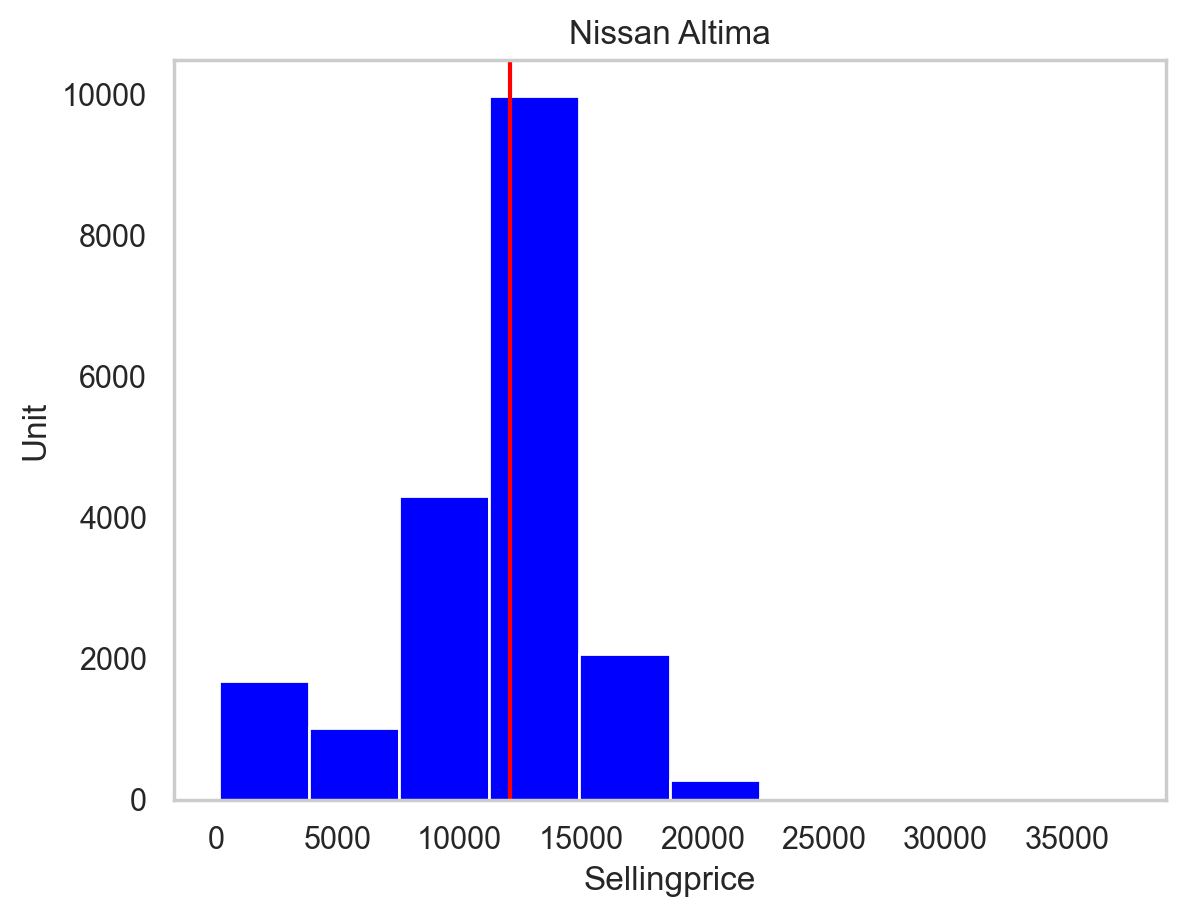

In [1381]:
alt['sellingprice'].hist(color='blue')
plt.axvline(alt['sellingprice'].median(), color='red')
plt.title('Nissan Altima')
plt.grid(False)
plt.xlabel('Sellingprice')
plt.ylabel('Unit')
plt.show()

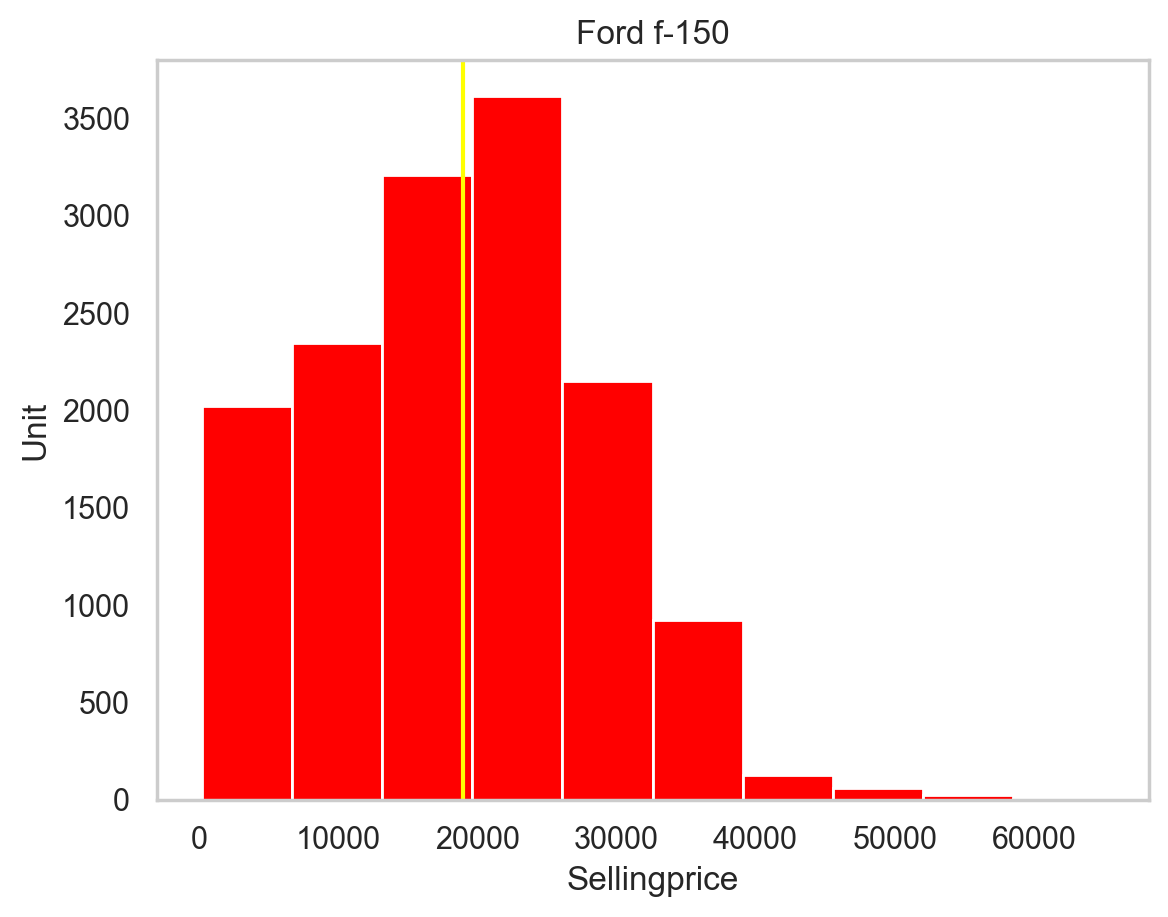

In [1382]:
f150 = cleaned_cs[cleaned_cs['model'] == 'f-150']
f150['sellingprice'].hist(color='red')
plt.axvline(f150['sellingprice'].median(), color='yellow')
plt.title('Ford f-150')
plt.grid(False)
plt.xlabel('Sellingprice')
plt.ylabel('Unit')
plt.show()

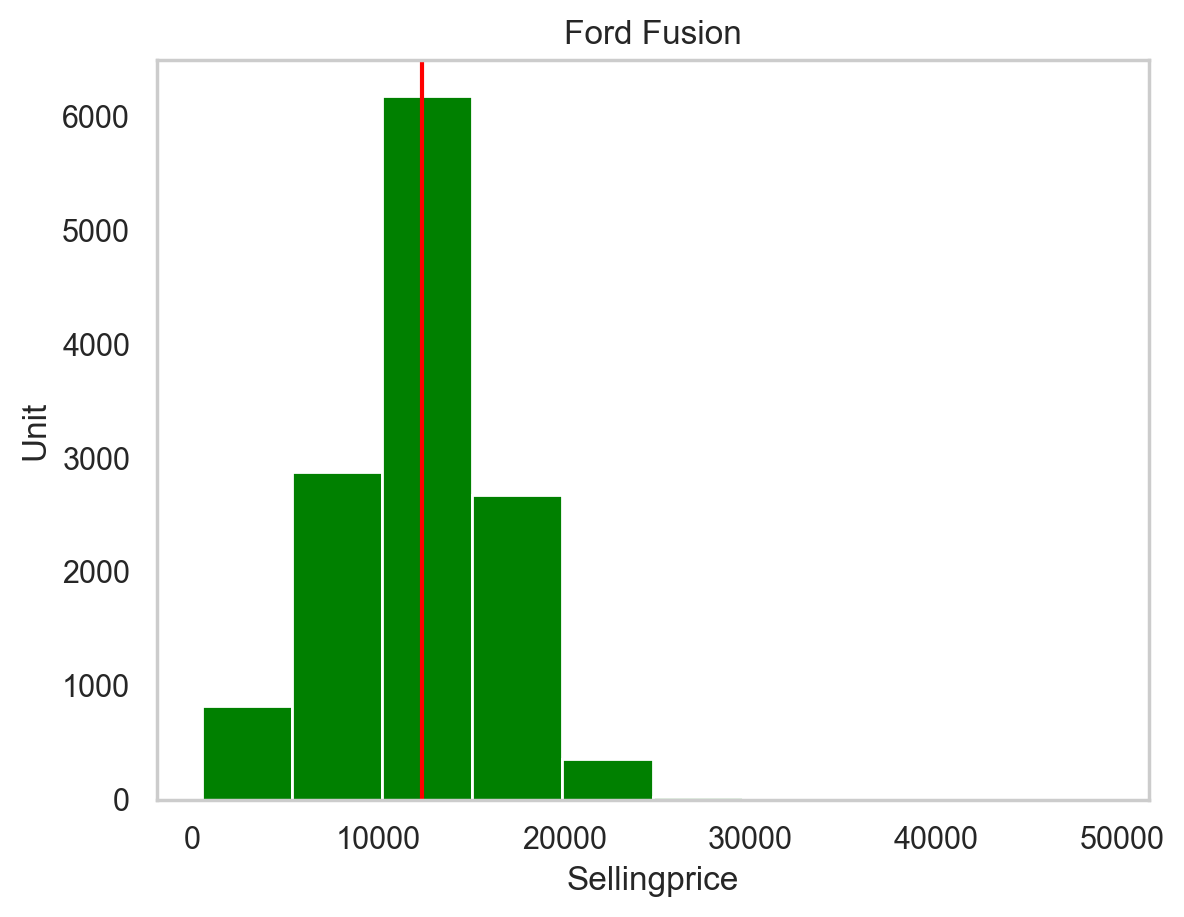

In [1383]:
fusion = cleaned_cs[cleaned_cs['model'] == 'fusion']
fusion['sellingprice'].hist(color='green')
plt.axvline(fusion['sellingprice'].mean(), color='red')
plt.title('Ford Fusion')
plt.grid(False)
plt.xlabel('Sellingprice')
plt.ylabel('Unit')
plt.show()

In [1384]:
altima_cleaned

5          5554.0
15        11398.0
51        10678.0
53         4314.0
103       12752.0
           ...   
558671    42507.0
558758    10771.0
558778        1.0
558787     9319.0
558835    16658.0
Name: odometer, Length: 17285, dtype: float64

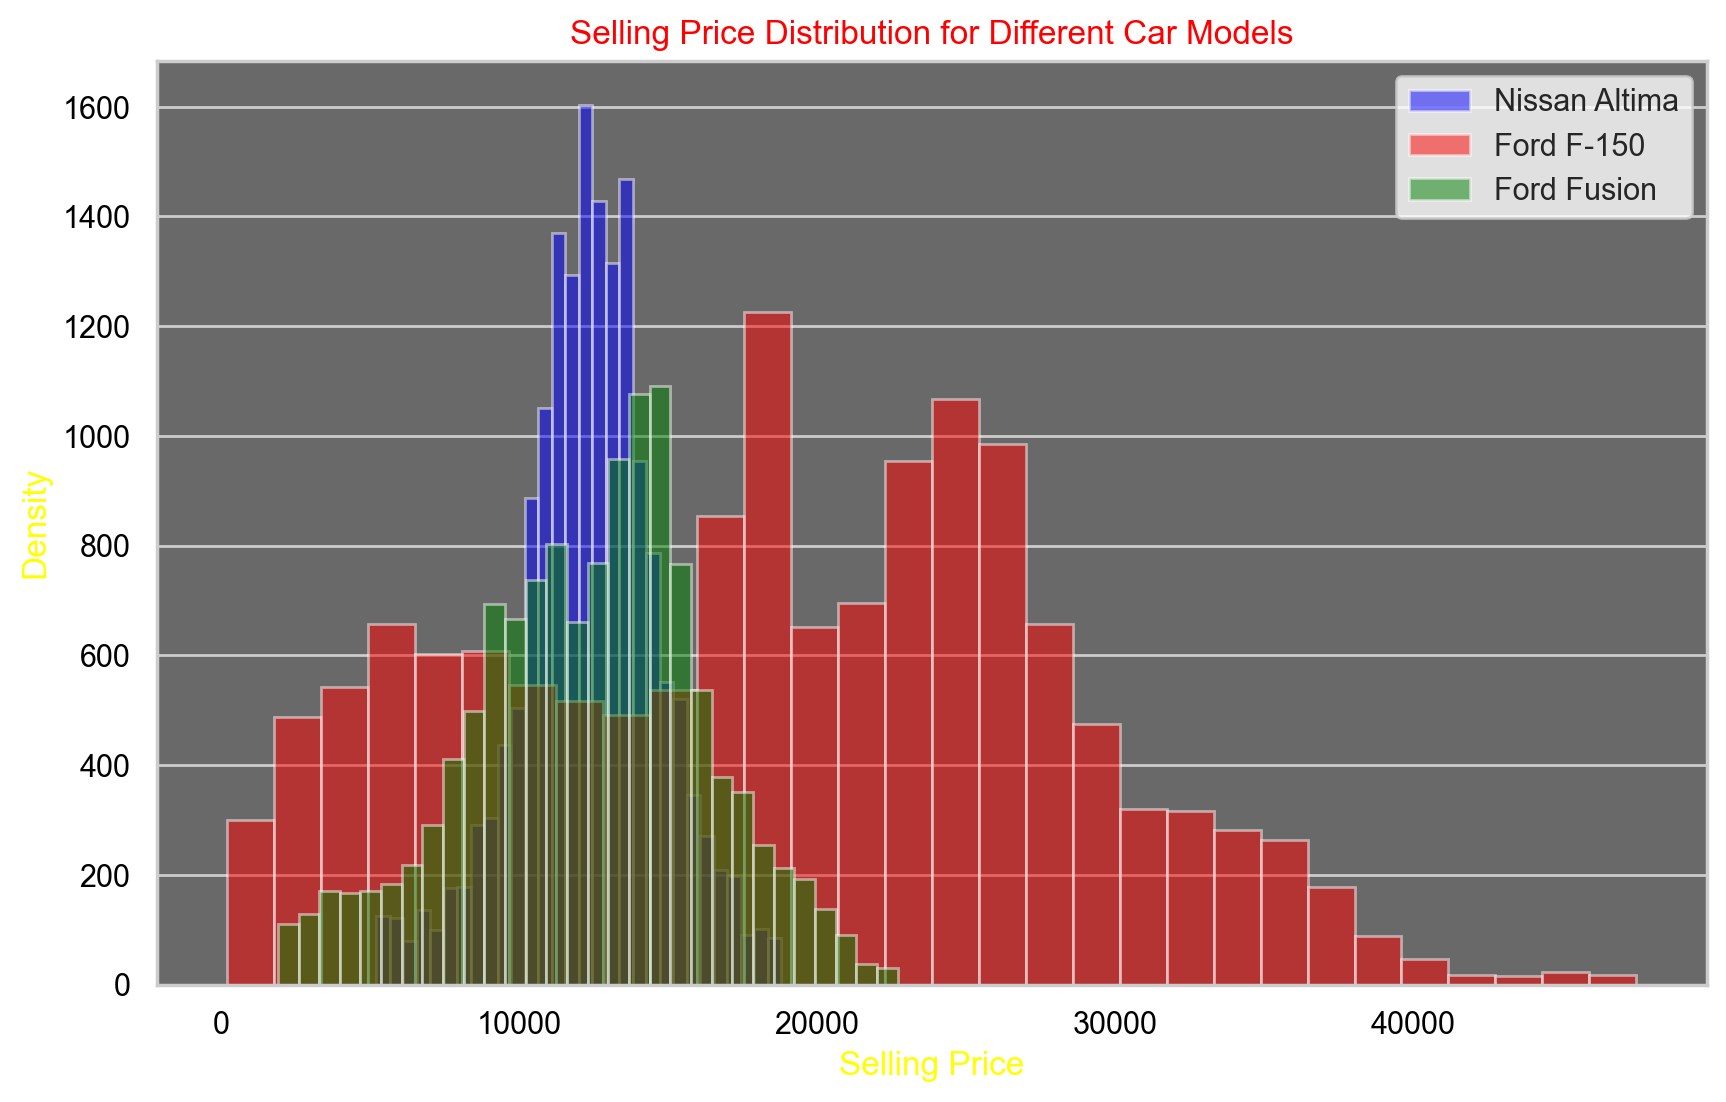

In [1390]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the 'sellingprice' column for each model
altima_clean = remove_outliers(altima, 'sellingprice')
f150_clean = remove_outliers(f150, 'sellingprice')
fusion_clean = remove_outliers(fusion, 'sellingprice')

# Plot the cleaned data
plt.figure(figsize=(10, 6))
plt.hist(altima_clean['sellingprice'], bins=30, alpha=0.5, label='Nissan Altima', color='blue')
plt.hist(f150_clean['sellingprice'], bins=30, alpha=0.5, label='Ford F-150', color='red')
plt.hist(fusion_clean['sellingprice'], bins=30, alpha=0.5, label='Ford Fusion', color='green')

plt.xlabel('Selling Price', color='yellow')
plt.ylabel('Density', color='yellow')
plt.title('Selling Price Distribution for Different Car Models', color='red')
plt.grid(axis='x')
plt.legend()

plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('dimgrey')
plt.show()



In [1386]:
def categorize(value):
    if 1 <= value <= 5000:
        return '1-5000'
    for i in range(5001, 100001, 5000):
        if i <= value < i + 5000:
            return f'{i}-{i + 5000 - 1}'
    if value >= 100000:
        return '100001+'
    return 'Other'

# Apply the custom function to the 'sellingprice' column
alt['category'] = alt['odometer'].apply(categorize)
f150['category'] = f150['odometer'].apply(categorize)
fusion['category'] = fusion['odometer'].apply(categorize)

# Group by the 'category' column and count the occurrences
g_alt = alt.groupby('category').agg({'sellingprice': ['count', 'mean']}).reset_index()
g_alt.columns = ['category', 'alt_count', 'alt_mean']

g_f150 = f150.groupby('category').agg({'sellingprice': ['count', 'mean']}).reset_index()
g_f150.columns = ['category', 'f150_count', 'f150_mean']

g_fusion = fusion.groupby('category').agg({'sellingprice': ['count', 'mean']}).reset_index()
g_fusion.columns = ['category', 'fusion_count', 'fusion_mean']


g_alt_s = g_alt.sort_values(by='category', ascending=True)
g_f150_s = g_f150.sort_values(by='category', ascending=True)
g_fusion_s = g_fusion.sort_values(by='category', ascending=True)

g_top = pd.merge(g_alt_s, pd.merge(g_f150_s, g_fusion_s, on='category', how='left'), on='category', how='left')
g_top = g_top.sort_values(by='fusion_mean',ascending=False)
g_top


C:\Users\Kmaun\AppData\Local\Temp\ipykernel_4016\596372713.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kmaun\AppData\Local\Temp\ipykernel_4016\596372713.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kmaun\AppData\Local\Temp\ipykernel_4016\596372713.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,category,alt_count,alt_mean,f150_count,f150_mean,fusion_count,fusion_mean
0,1-5000,260,14933.596154,261,22083.237548,126.0,16453.571429
11,5001-10000,534,15350.280899,672,22572.098214,302.0,16159.271523
3,15001-20000,1289,14312.451513,795,27103.113208,1155.0,16004.199134
2,10001-15000,879,14830.546075,792,25198.169192,588.0,15811.394558
4,20001-25000,1714,13746.966161,700,27355.071429,1283.0,15340.452065
5,25001-30000,1826,13255.257393,687,27565.502183,1103.0,14679.628286
6,30001-35000,2081,12810.716482,681,26557.048458,1362.0,14301.945668
7,35001-40000,2061,12482.411936,756,25994.279101,1150.0,13593.565217
8,40001-45000,1496,12188.670455,557,25190.215440,776.0,12968.427835
9,45001-50000,1088,11674.899816,568,24372.892606,447.0,11586.579418


In [1387]:
x = g_top['category']
y1 = g_top['alt_mean']
y2 = g_top['f150_mean']
y3 = g_top['fusion_mean']

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

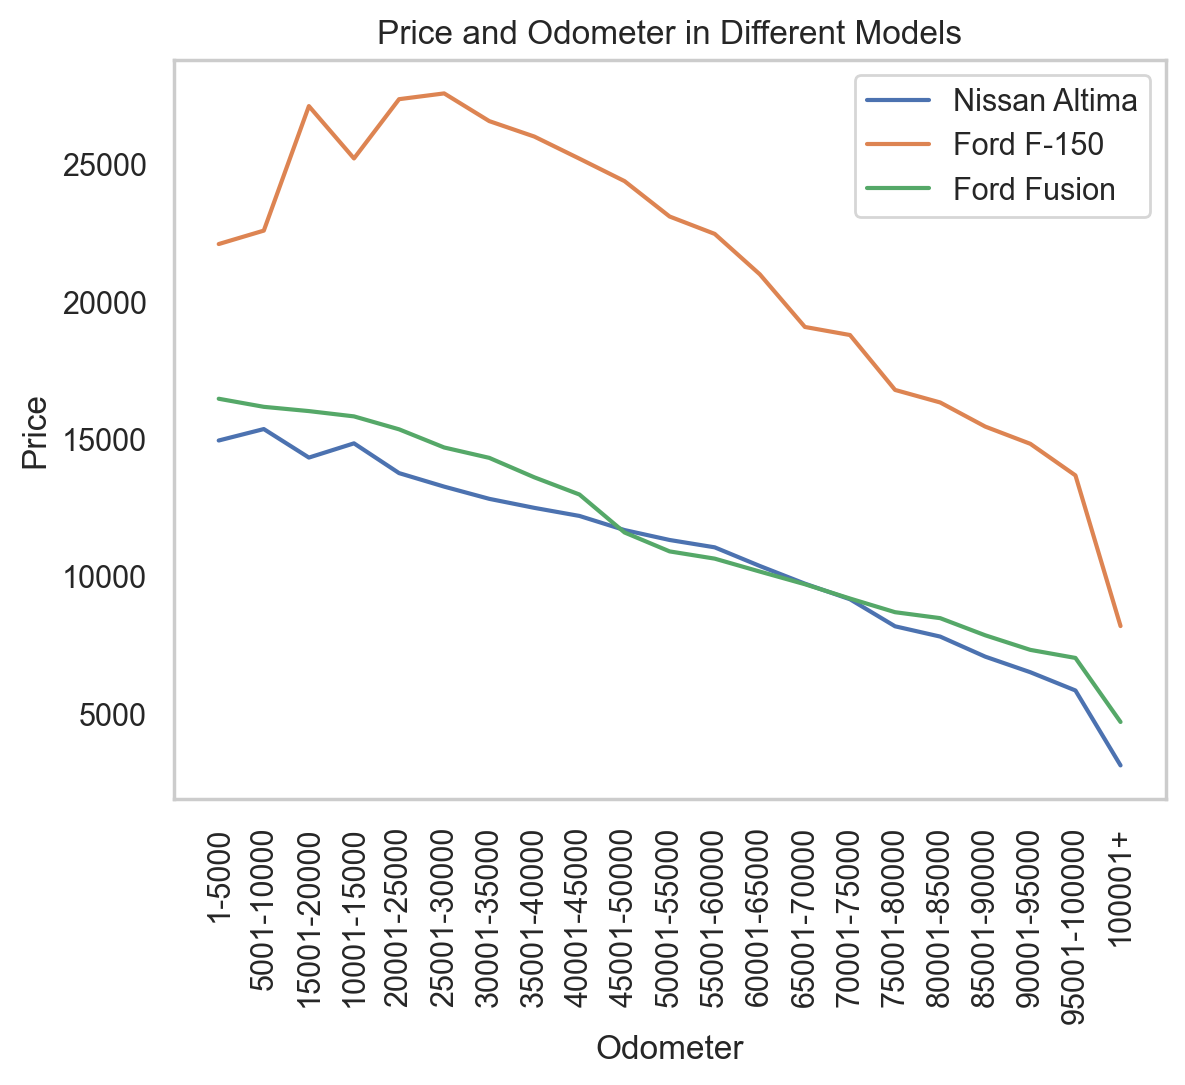

In [1388]:
plt.plot(g_top['category'], y1,label='Nissan Altima')
plt.plot(g_top['category'], y2,label='Ford F-150')
plt.plot(g_top['category'], y3,label='Ford Fusion')
plt.grid(False)
plt.xticks(rotation=90)
plt.title('Price and Odometer in Different Models')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.legend()
plt.plot

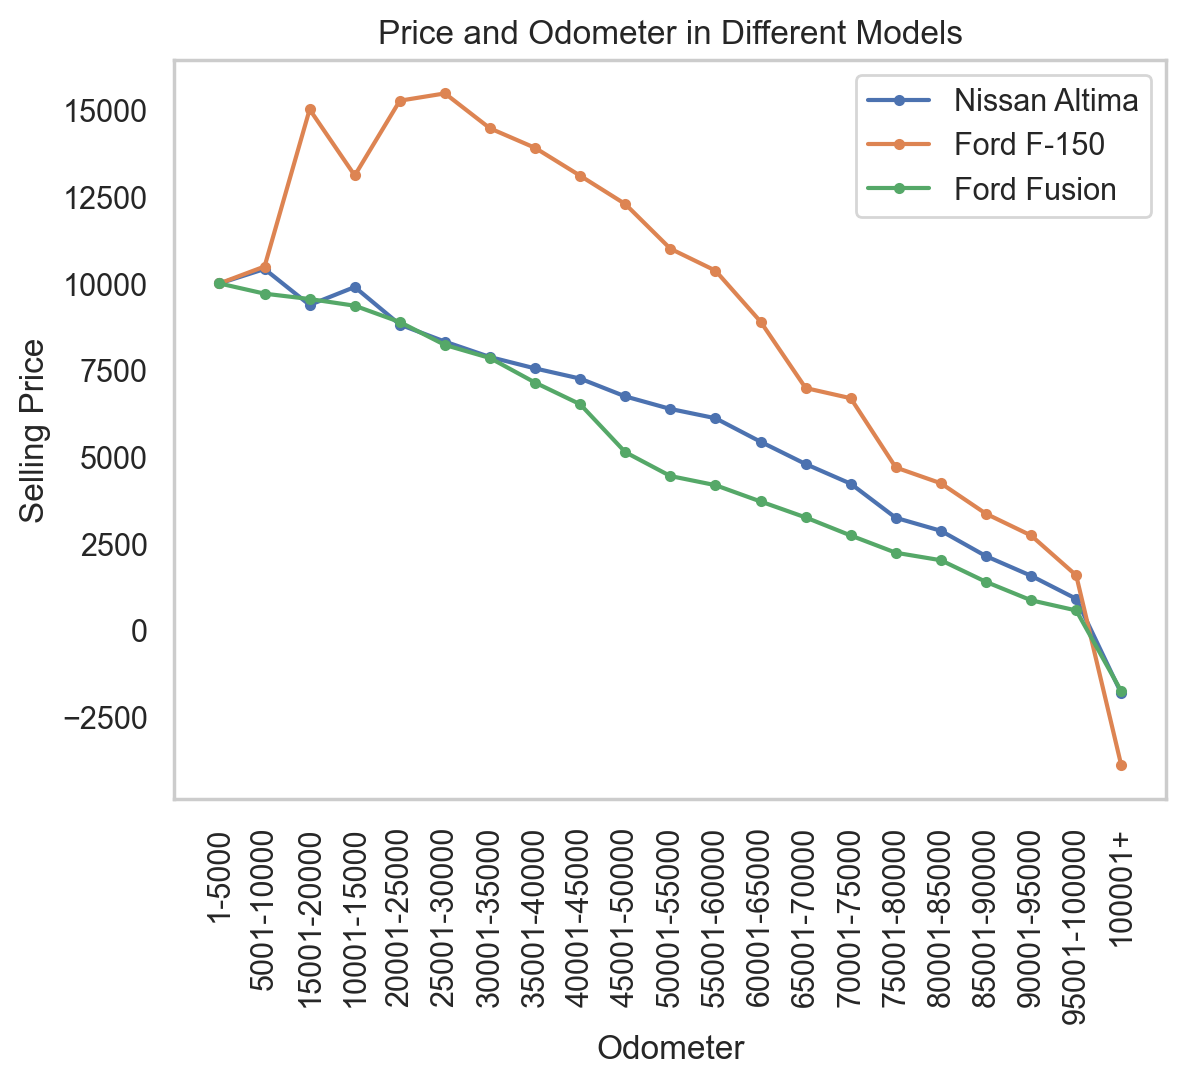

In [1391]:
# Align y-values to start at the same point
start_value = 10000  # Arbitrary starting value for alignment

alt_mean_aligned = g_top['alt_mean'] - g_top['alt_mean'].iloc[0] + start_value
f150_mean_aligned = g_top['f150_mean'] - g_top['f150_mean'].iloc[0] + start_value
fusion_mean_aligned = g_top['fusion_mean'] - g_top['fusion_mean'].iloc[0] + start_value

plt.plot(g_top['category'], alt_mean_aligned, label='Nissan Altima', marker='.')
plt.plot(g_top['category'], f150_mean_aligned, label='Ford F-150', marker='.')
plt.plot(g_top['category'], fusion_mean_aligned, label='Ford Fusion', marker='.')

plt.grid(False)
plt.xticks(rotation=90)
plt.title('Price and Odometer in Different Models')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.legend()
plt.show()


When considering the purchase of a vehicle, one of the key questions that often arises is its potential resale value. Many buyers wonder about the factors that can influence the selling price later on. Understanding these factors is crucial for making informed decisions and maximizing the value of your worth buying.

Cars are among the most commonly used modes of transportation in the USA. While some individuals purchase cars based on their personal preferences, others do not. Some individuals seek cars that align with their lifestyle, while others prioritize value and affordability, along with the potential for resale at a good price with low depreciation and liquidity. Today, we will explore the considerations and factors involved in purchasing a car for its worth, low depreciation, and potential for resale value.

In this exploration of the Vehicle Sales dataset, we aim to identify the best brand-new or used cars to buy when  it comes to considering value and worth, which can be sold to dealerships or directly to buyers for a good price while minimizing depreciation. Factors such as model popularity, mileage, car color and age of the vehicle will be analyzed to pinpoint cars that hold their value well over time.

<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">

<h1 style="text-align: left; font-weight: bold; font-size: 48px; background: linear-gradient(to right, Red, Orange,white,white); -webkit-background-clip: text; color: transparent;">Communication Result</h1>


Based on the analysis, if you plan to buy a car and sell it as a second-hand car, you should consider purchasing one of the following brands for potentially better resale value:

Ford
Chevrolet
Nissan
Toyota
Dodge
The top 5 bought car models are not provided in the information you've shared.

For a better resale value, you should aim for an automatic transmission car, as there is a significant difference between automatic and manual transmission cars in the resale market.

In terms of body type, sedans and SUVs are the most commonly bought types, so choosing one of these types could also improve your chances of a good resale value.

Regarding color, the top 5 preferred colors for cars are black, white, gray, silver, and blue.

For the interior, the most popular colors are black, gray, beige, tan, and brown.

it's good to sell

Lastly, it's important to note that cars with higher odometer readings tend to have lower selling prices, so considering a car with a lower mileage could be beneficial for resale.

In summary, to maximize your chances of a good resale value, consider buying a Ford, Chevrolet, Nissan, Toyota, or Dodge in an automatic transmission, sedan or SUV body type, with a black, white, gray, silver, or blue exterior, and a black, gray, beige, tan, or brown interior, while also ensuring the car has a lower odometer reading.

<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">